In [1]:
import pandas as pd
import numpy as np
import subprocess
import random
import pipeline_script
import seaborn as sns
import math
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.preprocessing import MinMaxScaler

Import Processed Participant DF

In [2]:
participant_df = pd.read_csv("participant_info_processed.csv",index_col="SID")
participant_df["GENDER"]=participant_df["GENDER"].apply(lambda x: 1 if x == "M" else 0)
participant_df.head()

,AGE,GENDER,BMI,OAHI,AHI,Mean_SaO2,Arousal Index,MEDICAL_HISTORY,Sleep_Disorders,asthma,...,eds,rbd,hypersomnia,grind teeth,insomnia,fatigue,morning headaches,bruxism,snore,headache
SID,,,,,,,,,,,,,,,,,,,,,
S002,0.679909,1,0.166667,19,19,91%,98,"Asthma, Body Pain, GERD, Hypertension, Sleep A...",OSA,0,...,0,0,0,0,0,0,0,0,0,0
S003,0.124049,0,0.611111,34,37,95%,28,NaN,"snoring, sleep apnea, difficulty breathing, sn...",0,...,0,0,0,0,0,0,0,0,0,0
S004,0.524049,0,0.425926,63,99,89%,109,"Arrhythmia, Body Pain, Depression, Dyspnea, GERD",difficulty breathing,0,...,0,0,0,0,0,0,0,0,0,0
S005,0.424505,0,0.462963,19,20,95%,28,"Asthma, Body Pain, Depression, Diabetes, Dyspn...",OSA,0,...,0,0,0,0,0,0,0,0,0,0
S006,0.238661,0,0.074074,4,5,97%,34,"Depression, Sleep Apnea",OSA,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
patient_records = pipeline_script.gather_dict("/Users/ufukcefaker/Desktop/bbm_folders/bbm469/normalized_data_3/")

100%|██████████| 98/98 [00:09<00:00,  9.89it/s]


Specify The Columns To Use In Training And Prediction

In [4]:
patient_records["S002"].head(1).columns

Index(['TIMESTAMP', 'BVP', 'ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR',
       'IBI', 'IBI_Moving_Average_640', 'IBI_Moving_STD_640', 'ACC',
       'HR_Divided_Mean', 'HR_Divided_Median',
       'Abnormal_IBI_Moving_4_Mean_Scaled', 'Sleep_Stage',
       'Abnormal_IBI_Moving_3', 'Abnormal_IBI_Moving_4'],
      dtype='object')

In [5]:
columns = [ 'BVP', 'ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR',
       'IBI',
       'Multiple_Events', 'IBI_Moving_Average_640', 'IBI_Moving_STD_640',
       'Abnormal_IBI_Moving_3', 'Abnormal_IBI_Moving_4', 'ACC',
       'HR_Divided_Mean', 'HR_Divided_Median',
       'Abnormal_IBI_Moving_4_Mean_Scaled']

In [7]:
participant_df.columns

Index(['AGE', 'GENDER', 'BMI', 'OAHI', 'AHI', 'Mean_SaO2', 'Arousal Index',
       'MEDICAL_HISTORY', 'Sleep_Disorders', 'asthma', 'body pain', 'gerd',
       'hypertension', 'sleep apnea', 'arrhythmia', 'depression', 'dyspnea',
       'diabetes', 'cad', 'anxiety', 'migraine', 'osa', 'snoring',
       'difficulty breathing', 'difficulty staying asleep', 'snort', 'rls',
       'eds', 'rbd', 'hypersomnia', 'grind teeth', 'insomnia', 'fatigue',
       'morning headaches', 'bruxism', 'snore', 'headache'],
      dtype='object')

In [6]:
columns_participant=['AGE', 'GENDER', 'BMI','asthma',
       'body pain', 'gerd', 'hypertension', 'sleep apnea', 'arrhythmia',
       'depression', 'dyspnea', 'diabetes', 'cad', 'anxiety', 'migraine',
       'osa', 'snoring', 'difficulty breathing', 'difficulty staying asleep',
       'snort', 'rls', 'eds', 'rbd', 'hypersomnia', 'grind teeth', 'insomnia',
       'fatigue', 'morning headaches', 'bruxism', 'snore', 'headache']

Dimensionality =

In [8]:
print(len(columns)+len(columns_participant))

48


In [ ]:
for patient_id, patient_data in patient_records.items():
    # Count the occurrences of each Sleep_Stage
    counts = patient_data["Sleep_Stage"].value_counts()
    print(patient_id)
    print(counts)

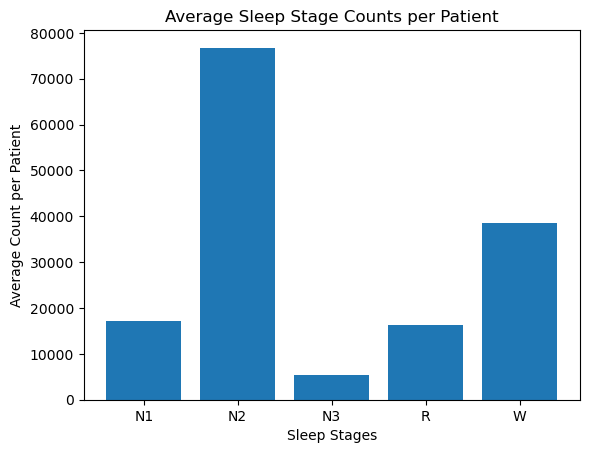

In [10]:
# Örnek total_counts
total_counts = {"N1": 0, "N2": 0, "N3": 0, "P": 0, "R": 0, "W": 0}

# Her bir dataframe'deki Sleep_Stage class'larını toplamak
for patient_id, df in patient_records.items():
    stage_counts = df['Sleep_Stage'].value_counts()
    for stage, count in stage_counts.items():
        if stage in total_counts:
            total_counts[stage] += count

# Hasta sayısı
patient_count = len(patient_records)

# Sınıf başına düşen ortalama
average_counts = {stage: count / patient_count for stage, count in total_counts.items()}
average_counts.pop("P")

# Visualize etme
plt.bar(average_counts.keys(), average_counts.values())
plt.xlabel('Sleep Stages')
plt.ylabel('Average Count per Patient')
plt.title('Average Sleep Stage Counts per Patient')
plt.show()


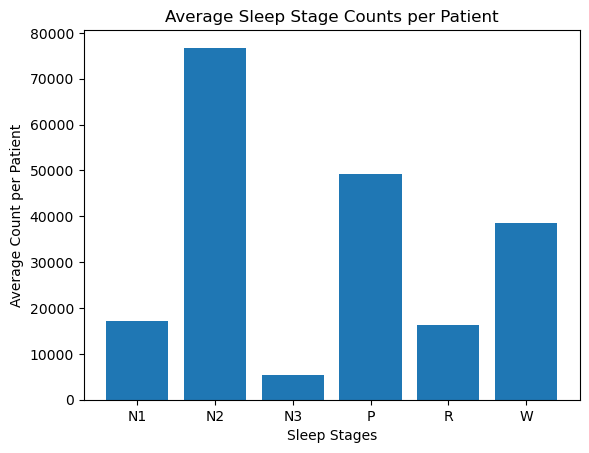

In [11]:
# Örnek total_counts
total_counts = {"N1": 0, "N2": 0, "N3": 0, "P": 0, "R": 0, "W": 0}

# Her bir dataframe'deki Sleep_Stage class'larını toplamak
for patient_id, df in patient_records.items():
    stage_counts = df['Sleep_Stage'].value_counts()
    for stage, count in stage_counts.items():
        if stage in total_counts:
            total_counts[stage] += count

# Hasta sayısı
patient_count = len(patient_records)

# Sınıf başına düşen ortalama
average_counts = {stage: count / patient_count for stage, count in total_counts.items()}


# Visualize etme
plt.bar(average_counts.keys(), average_counts.values())
plt.xlabel('Sleep Stages')
plt.ylabel('Average Count per Patient')
plt.title('Average Sleep Stage Counts per Patient')
plt.show()

In [12]:
# N2 değerlerini toplamak için bir liste
n2_counts = []

# Her bir hastanın N2 sayısını bul
for patient_id, df in patient_records.items():
    n2_count = df['Sleep_Stage'].value_counts().get("N2", 0)
    n2_counts.append((patient_id, n2_count))

# N2 değerine göre sıralama
n2_counts_sorted = sorted(n2_counts, key=lambda x: x[1])

# İlk 5 hastayı seçme
top_5_patients_with_min_n2 = n2_counts_sorted[:5]

# Sonuçları yazdırma
print("N2 değeri en az olan ilk 5 hasta:")
for patient_id, n2_count in top_5_patients_with_min_n2:
    print(f"Hasta ID: {patient_id}, N2 Sayısı: {n2_count}")

N2 değeri en az olan ilk 5 hasta:
Hasta ID: S082, N2 Sayısı: 15360
Hasta ID: S087, N2 Sayısı: 18432
Hasta ID: S096, N2 Sayısı: 27072
Hasta ID: S090, N2 Sayısı: 30720
Hasta ID: S072, N2 Sayısı: 30912


In [13]:
# N3 değeri 0 olan hastaların kimliklerini toplamak
patients_with_n3_zero = []

# Her bir hastanın N3 sayısını kontrol et
for patient_id, df in patient_records.items():
    n3_count = df['Sleep_Stage'].value_counts().get("N3", 0)
    if n3_count == 0:
        patients_with_n3_zero.append(patient_id)

# Sonuçları yazdır
print(f"N3 değeri 0 olan hastalar: {patients_with_n3_zero}")
n3_zero_count = len(patients_with_n3_zero)
print(f"N3 değeri 0 olan hasta sayısı: {n3_zero_count}")

N3 değeri 0 olan hastalar: ['S083', 'S029', 'S084', 'S058', 'S018', 'S068', 'S085', 'S082', 'S019', 'S053', 'S088', 'S022', 'S025', 'S070', 'S037', 'S062', 'S047', 'S012', 'S055', 'S063', 'S064', 'S071', 'S024', 'S089', 'S101', 'S010', 'S045', 'S017', 'S002', 'S057', 'S021', 'S074', 'S051', 'S056', 'S043', 'S016', 'S072', 'S067', 'S032', 'S038', 'S080', 'S078', 'S087', 'S049', 'S086', 'S079', 'S093', 'S039', 'S048']
N3 değeri 0 olan hasta sayısı: 49


In [14]:
# N2 değerlerini toplamak için bir liste
n2_counts = []

# Her bir hastanın N2 sayısını bul
for patient_id, df in patient_records.items():
    n2_count = df['Sleep_Stage'].value_counts().get("N2", 0)
    n2_counts.append((patient_id, n2_count))

# N2 değerine göre azalan sırayla sıralama
n2_counts_sorted = sorted(n2_counts, key=lambda x: x[1], reverse=True)

# N2 değeri maksimum olan 5 hastayı bul
top_5_n2_patients = n2_counts_sorted[:5]

# Sonuçları yazdır
print("N2 değeri maksimum olan 5 hasta ve değerleri:")
for patient_id, n2_count in top_5_n2_patients:
    print(f"Hasta ID: {patient_id}, N2 Sayısı: {n2_count}")


N2 değeri maksimum olan 5 hasta ve değerleri:
Hasta ID: S074, N2 Sayısı: 125761
Hasta ID: S100, N2 Sayısı: 116545
Hasta ID: S031, N2 Sayısı: 111168
Hasta ID: S050, N2 Sayısı: 110784
Hasta ID: S033, N2 Sayısı: 107137


In [34]:
# R değerlerini toplamak için bir liste
r_counts = []

# Her bir hastanın R sayısını bul
for patient_id, df in patient_records.items():
    r_count = df['Sleep_Stage'].value_counts().get("R", 0)
    r_counts.append((patient_id, r_count))

# R değerine göre azalan sırayla sıralama
r_counts_sorted = sorted(r_counts, key=lambda x: x[1], reverse=True)

# R değeri maksimum olan 5 hastayı bul
top_5_r_patients = r_counts_sorted[:5]

# Sonuçları yazdır
print("R değeri maksimum olan 5 hasta ve değerleri:")
for patient_id, r_count in top_5_r_patients:
    print(f"Hasta ID: {patient_id}, R Sayısı: {r_count}")

R değeri maksimum olan 5 hasta ve değerleri:
Hasta ID: S036, R Sayısı: 46272
Hasta ID: S026, R Sayısı: 39936
Hasta ID: S078, R Sayısı: 38784
Hasta ID: S079, R Sayısı: 38592
Hasta ID: S084, R Sayısı: 37056


In [35]:
# N3 değerlerini toplamak için bir liste
n3_counts = []

# Her bir hastanın N3 sayısını bul
for patient_id, df in patient_records.items():
    n3_count = df['Sleep_Stage'].value_counts().get("N3", 0)
    n3_counts.append((patient_id, n3_count))

# N3 değerine göre azalan sırayla sıralama
n3_counts_sorted = sorted(n3_counts, key=lambda x: x[1], reverse=True)

# N3 değeri maksimum olan 5 hastayı bul
top_5_n3_patients = n3_counts_sorted[:5]

# Sonuçları yazdır
print("N3 değeri maksimum olan 5 hasta ve değerleri:")
for patient_id, n3_count in top_5_n3_patients:
    print(f"Hasta ID: {patient_id}, N3 Sayısı: {n3_count}")

N3 değeri maksimum olan 5 hasta ve değerleri:
Hasta ID: S092, N3 Sayısı: 37248
Hasta ID: S006, N3 Sayısı: 34176
Hasta ID: S091, N3 Sayısı: 30144
Hasta ID: S034, N3 Sayısı: 29184
Hasta ID: S076, N3 Sayısı: 27072


Creating Model

1. Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold


In [ ]:
train_set1 = {}
for i,v in tqdm(patient_records.items()):
    train_set1[i] = v.loc[v["Sleep_Stage"]!="P"]
    for column in columns_participant:
        train_set1[i].loc[:,column] = participant_df.loc[i,column]

In [ ]:
train_set3 = {}
for i, v in tqdm(patient_records.items()):
    train_set3[i] = v.loc[~v["Sleep_Stage"].isin(["P", "N3"])]  # "P" ve "N3" dahil edilmeyecek
    for column in columns_participant:
        train_set3[i].loc[:, column] = participant_df.loc[i, column]

In [9]:
train_set4 = {}
for i, v in tqdm(patient_records.items()):
    # Hasta verilerini kopyalayarak tüm sleep stage'leri dahil et
    train_set4[i] = v.copy()
    # Katılımcı bilgilerini ekle
    for column in columns_participant:
        train_set4[i].loc[:, column] = participant_df.loc[i, column]

100%|██████████| 98/98 [00:02<00:00, 39.01it/s]


In [15]:
train_set2 = patient_records
print(train_set2["S002"])

        TIMESTAMP       BVP     ACC_X     ACC_Y     ACC_Z      TEMP       EDA  \
0        0.000002  0.516264  0.619608  0.533333  0.716078  0.892820  0.001266   
1        0.000006  0.515512  0.612549  0.533333  0.712157  0.892820  0.001266   
2        0.000010  0.515111  0.595294  0.540392  0.725490  0.892820  0.001266   
3        0.000015  0.516043  0.560000  0.536471  0.709804  0.892820  0.001266   
4        0.000019  0.516259  0.613333  0.537255  0.732549  0.892820  0.001266   
...           ...       ...       ...       ...       ...       ...       ...   
201365   0.848343  0.507634  0.372549  0.407843  0.698039  0.884495  0.002443   
201366   0.848347  0.534856  0.372549  0.407843  0.698039  0.884495  0.002456   
201367   0.848352  0.525918  0.372549  0.407843  0.698039  0.884495  0.002465   
201368   0.848356  0.539900  0.372549  0.407843  0.698039  0.884495  0.002465   
201369   0.848359  0.530366  0.372549  0.407843  0.699160  0.884272  0.002469   

              HR       IBI 

In [24]:
train_set1["S002"].head()

,TIMESTAMP,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI,IBI_Moving_Average_640,...,eds,rbd,hypersomnia,grind teeth,insomnia,fatigue,morning headaches,bruxism,snore,headache
58714,0.247361,0.517641,0.418824,0.258824,0.522353,0.71384,0.001133,0.258472,0.444444,0.360330,...,0,0,0,0,0,0,0,0,0,0
58715,0.247365,0.515657,0.418039,0.262745,0.530980,0.71384,0.001150,0.258472,0.444444,0.360692,...,0,0,0,0,0,0,0,0,0,0
58716,0.247370,0.516308,0.417255,0.261961,0.527059,0.71384,0.001146,0.258472,0.444444,0.361053,...,0,0,0,0,0,0,0,0,0,0
58717,0.247374,0.514324,0.419608,0.260392,0.523922,0.71384,0.001111,0.258472,0.444444,0.361415,...,0,0,0,0,0,0,0,0,0,0
58718,0.247378,0.513870,0.418824,0.260392,0.521569,0.71384,0.001124,0.258472,0.444444,0.361777,...,0,0,0,0,0,0,0,0,0,0


In [25]:
train_set1["S002"].columns

Index(['TIMESTAMP', 'BVP', 'ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR',
       'IBI', 'IBI_Moving_Average_640', 'IBI_Moving_STD_640', 'ACC',
       'HR_Divided_Mean', 'HR_Divided_Median',
       'Abnormal_IBI_Moving_4_Mean_Scaled', 'Sleep_Stage',
       'Abnormal_IBI_Moving_3', 'Abnormal_IBI_Moving_4', 'AGE', 'GENDER',
       'BMI', 'asthma', 'body pain', 'gerd', 'hypertension', 'sleep apnea',
       'arrhythmia', 'depression', 'dyspnea', 'diabetes', 'cad', 'anxiety',
       'migraine', 'osa', 'snoring', 'difficulty breathing',
       'difficulty staying asleep', 'snort', 'rls', 'eds', 'rbd',
       'hypersomnia', 'grind teeth', 'insomnia', 'fatigue',
       'morning headaches', 'bruxism', 'snore', 'headache'],
      dtype='object')

1 process:


<Figure size 1200x800 with 0 Axes>

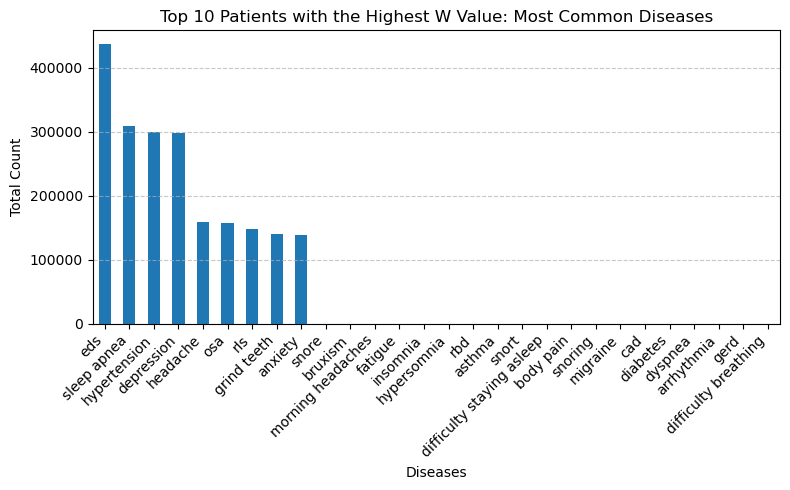

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Hastalıklar listesi
conditions = [
    'asthma', 'body pain', 'gerd', 'hypertension', 'sleep apnea', 'arrhythmia',
    'depression', 'dyspnea', 'diabetes', 'cad', 'anxiety', 'migraine',
    'osa', 'snoring', 'difficulty breathing', 'difficulty staying asleep',
    'snort', 'rls', 'eds', 'rbd', 'hypersomnia', 'grind teeth', 'insomnia',
    'fatigue', 'morning headaches', 'bruxism', 'snore', 'headache'
]

# train_set1 içinde W değeri en fazla olan ilk 10 hastayı bul
w_counts = {patient: data["Sleep_Stage"].value_counts().get("W", 0) for patient, data in train_set1.items()}
top_10_patients = sorted(w_counts, key=w_counts.get, reverse=True)[:10]
print("1 process:")
# Bu hastalardaki hastalık durumlarını birleştir
condition_counts = {condition: 0 for condition in conditions}

for patient in top_10_patients:
    for condition in conditions:
        if condition in train_set1[patient].columns:  # Eğer hastalık sütunu varsa
            condition_counts[condition] += train_set1[patient][condition].sum()

# Hastalık durumlarını sıralı bir şekilde DataFrame'e çevir
condition_df = pd.DataFrame.from_dict(condition_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# Görselleştirme
plt.figure(figsize=(12, 8))
condition_df.plot(kind='bar', legend=False, figsize=(8, 5))  # Aynı figsize burada da kullanılabilir
plt.title("Top 10 Patients with the Highest W Value: Most Common Diseases")
plt.xlabel("Diseases")
plt.ylabel("Total Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from PIL import Image

# Görseli yükle
image_path = "path_to_your_image.png"  # Görselin mevcut yolu
output_path = "resized_image.png"      # Çıktı görselinin kaydedileceği yol

# Görseli aç
image = Image.open(image_path)

# Yeni boyutları belirleyin (örneğin, %50 daha küçük)
new_width = image.width // 2
new_height = image.height // 2

# Görseli yeniden boyutlandır
resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)

# Görseli kaydet
resized_image.save(output_path)

# Çıktıyı kontrol edin
output_path

<Figure size 1200x800 with 0 Axes>

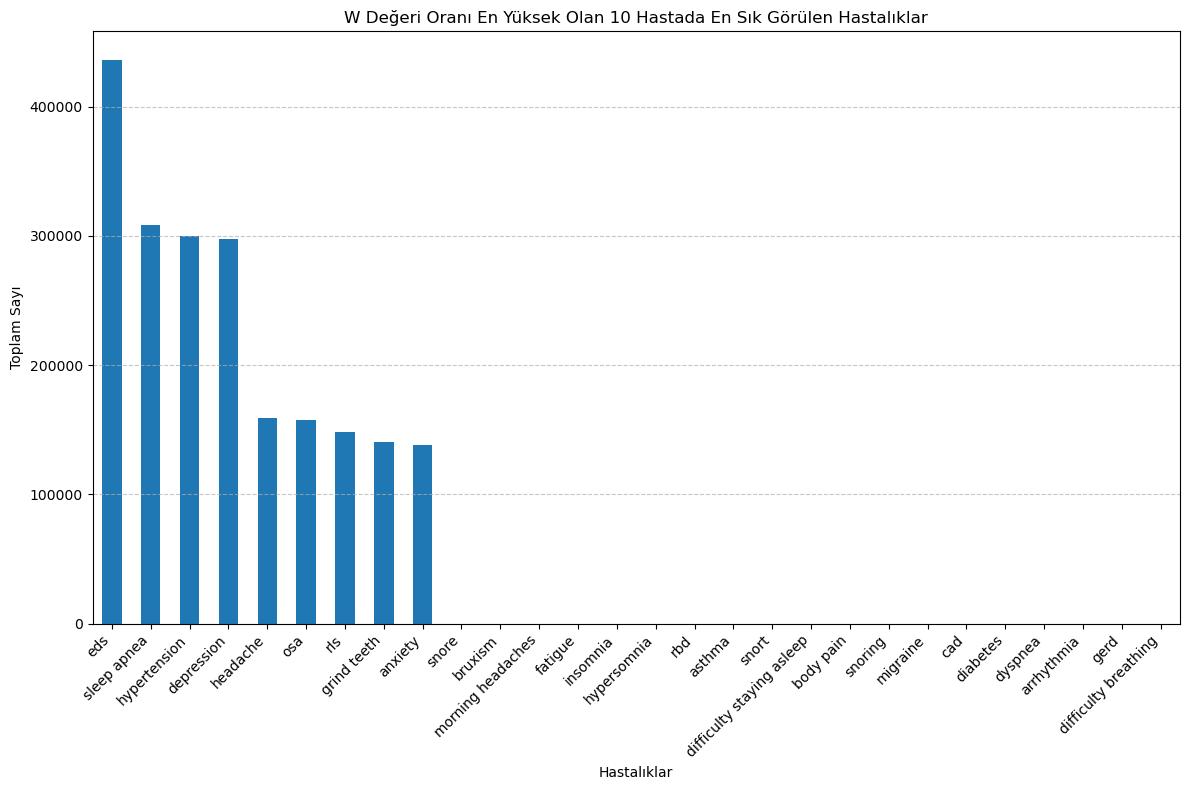

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Hastalıklar listesi
conditions = [
    'asthma', 'body pain', 'gerd', 'hypertension', 'sleep apnea', 'arrhythmia',
    'depression', 'dyspnea', 'diabetes', 'cad', 'anxiety', 'migraine',
    'osa', 'snoring', 'difficulty breathing', 'difficulty staying asleep',
    'snort', 'rls', 'eds', 'rbd', 'hypersomnia', 'grind teeth', 'insomnia',
    'fatigue', 'morning headaches', 'bruxism', 'snore', 'headache'
]

# train_set1 içinde W oranı en yüksek olan ilk 10 hastayı bul
w_ratios = {
    patient: data["Sleep_Stage"].value_counts().get("W", 0) / len(data)
    for patient, data in train_set1.items()
}

# W oranına göre en yüksek 10 hastayı seç
top_10_patients = sorted(w_ratios, key=w_ratios.get, reverse=True)[:10]

# Bu hastalardaki hastalık durumlarını birleştir
condition_counts = {condition: 0 for condition in conditions}

for patient in top_10_patients:
    for condition in conditions:
        if condition in train_set1[patient].columns:  # Eğer hastalık sütunu varsa
            condition_counts[condition] += train_set1[patient][condition].sum()

# Hastalık durumlarını sıralı bir şekilde DataFrame'e çevir
condition_df = pd.DataFrame.from_dict(condition_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# Görselleştirme
plt.figure(figsize=(12, 8))
condition_df.plot(kind='bar', legend=False, figsize=(12, 8))
plt.title("W Değeri Oranı En Yüksek Olan 10 Hastada En Sık Görülen Hastalıklar")
plt.xlabel("Hastalıklar")
plt.ylabel("Toplam Sayı")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1200x800 with 0 Axes>

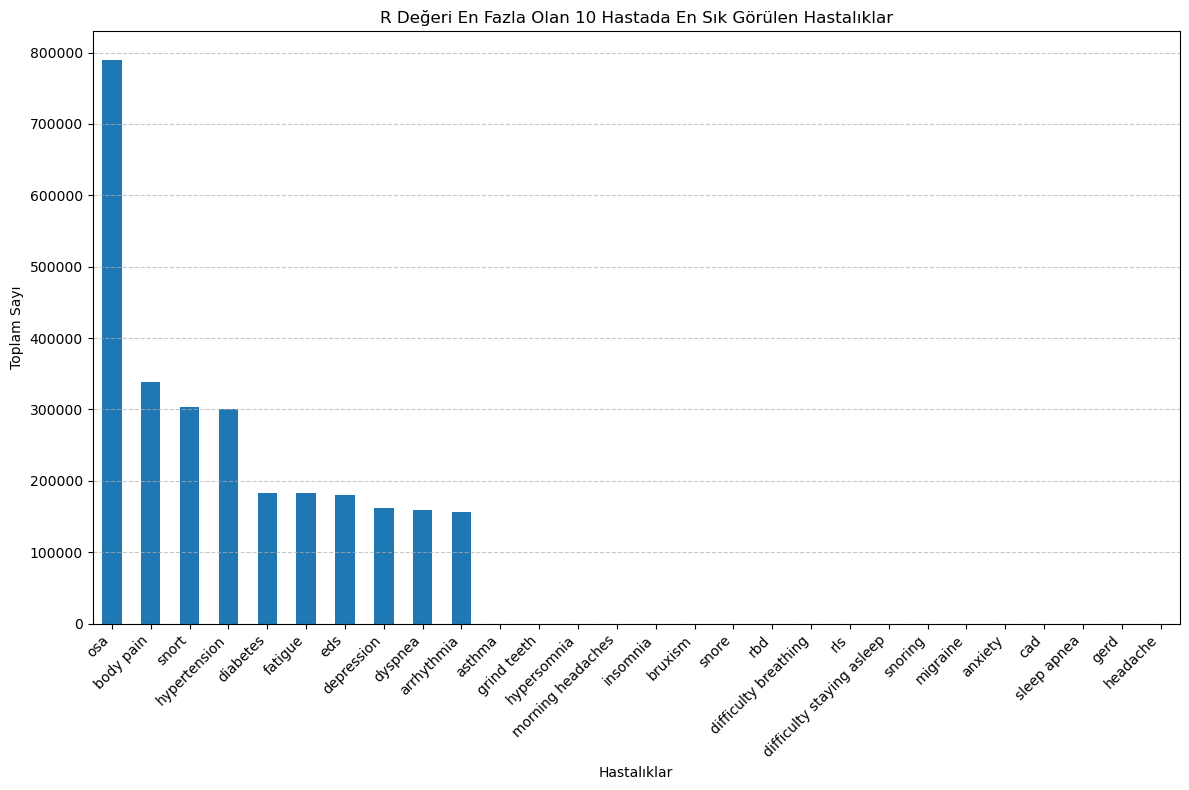

In [27]:
# Hastalıklar listesi
conditions = [
    'asthma', 'body pain', 'gerd', 'hypertension', 'sleep apnea', 'arrhythmia',
    'depression', 'dyspnea', 'diabetes', 'cad', 'anxiety', 'migraine',
    'osa', 'snoring', 'difficulty breathing', 'difficulty staying asleep',
    'snort', 'rls', 'eds', 'rbd', 'hypersomnia', 'grind teeth', 'insomnia',
    'fatigue', 'morning headaches', 'bruxism', 'snore', 'headache'
]

# train_set1 içinde R değeri en fazla olan ilk 10 hastayı bul
r_counts = {patient: data["Sleep_Stage"].value_counts().get("R", 0) for patient, data in train_set1.items()}
top_10_patients = sorted(r_counts, key=r_counts.get, reverse=True)[:10]

# Bu hastalardaki hastalık durumlarını birleştir
condition_counts = {condition: 0 for condition in conditions}

for patient in top_10_patients:
    for condition in conditions:
        if condition in train_set1[patient].columns:  # Eğer hastalık sütunu varsa
            condition_counts[condition] += train_set1[patient][condition].sum()

# Hastalık durumlarını sıralı bir şekilde DataFrame'e çevir
condition_df = pd.DataFrame.from_dict(condition_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# Görselleştirme
plt.figure(figsize=(12, 8))
condition_df.plot(kind='bar', legend=False, figsize=(12, 8))
plt.title("R Değeri En Fazla Olan 10 Hastada En Sık Görülen Hastalıklar")
plt.xlabel("Hastalıklar")
plt.ylabel("Toplam Sayı")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


1 process:


<Figure size 1200x800 with 0 Axes>

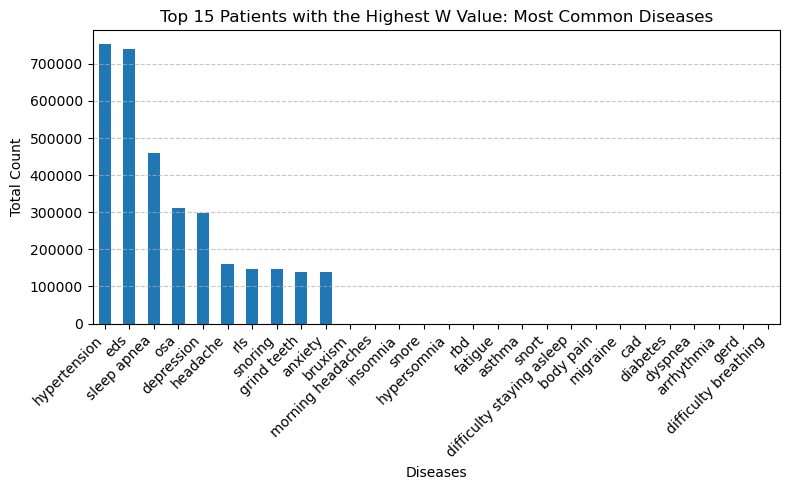

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Hastalıklar listesi
conditions = [
    'asthma', 'body pain', 'gerd', 'hypertension', 'sleep apnea', 'arrhythmia',
    'depression', 'dyspnea', 'diabetes', 'cad', 'anxiety', 'migraine',
    'osa', 'snoring', 'difficulty breathing', 'difficulty staying asleep',
    'snort', 'rls', 'eds', 'rbd', 'hypersomnia', 'grind teeth', 'insomnia',
    'fatigue', 'morning headaches', 'bruxism', 'snore', 'headache'
]

# train_set1 içinde W değeri en fazla olan ilk 10 hastayı bul
w_counts = {patient: data["Sleep_Stage"].value_counts().get("W", 0) for patient, data in train_set1.items()}
top_15_patients = sorted(w_counts, key=w_counts.get, reverse=True)[:15]
print("1 process:")
# Bu hastalardaki hastalık durumlarını birleştir
condition_counts = {condition: 0 for condition in conditions}

for patient in top_15_patients:
    for condition in conditions:
        if condition in train_set1[patient].columns:  # Eğer hastalık sütunu varsa
            condition_counts[condition] += train_set1[patient][condition].sum()

# Hastalık durumlarını sıralı bir şekilde DataFrame'e çevir
condition_df = pd.DataFrame.from_dict(condition_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# Görselleştirme
plt.figure(figsize=(12, 8))
condition_df.plot(kind='bar', legend=False, figsize=(8, 5))  # Aynı figsize burada da kullanılabilir
plt.title("Top 15 Patients with the Highest W Value: Most Common Diseases")
plt.xlabel("Diseases")
plt.ylabel("Total Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1 process:


<Figure size 1200x800 with 0 Axes>

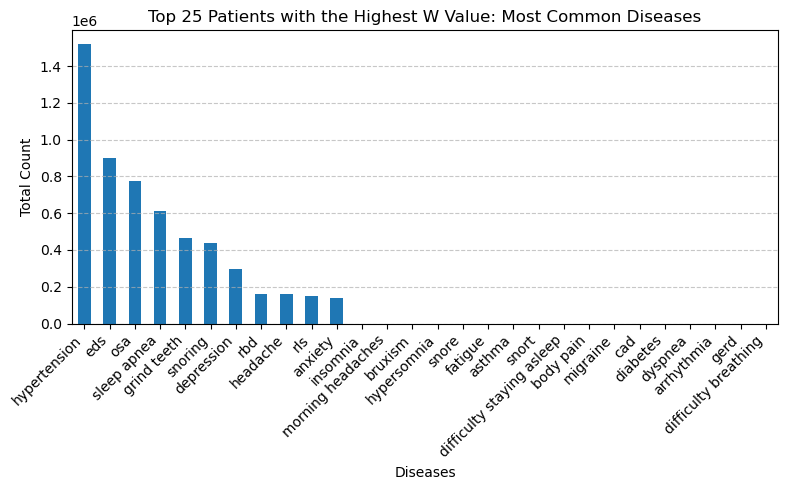

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Hastalıklar listesi
conditions = [
    'asthma', 'body pain', 'gerd', 'hypertension', 'sleep apnea', 'arrhythmia',
    'depression', 'dyspnea', 'diabetes', 'cad', 'anxiety', 'migraine',
    'osa', 'snoring', 'difficulty breathing', 'difficulty staying asleep',
    'snort', 'rls', 'eds', 'rbd', 'hypersomnia', 'grind teeth', 'insomnia',
    'fatigue', 'morning headaches', 'bruxism', 'snore', 'headache'
]

# train_set1 içinde W değeri en fazla olan ilk 10 hastayı bul
w_counts = {patient: data["Sleep_Stage"].value_counts().get("W", 0) for patient, data in train_set1.items()}
top_25_patients = sorted(w_counts, key=w_counts.get, reverse=True)[:25]
print("1 process:")
# Bu hastalardaki hastalık durumlarını birleştir
condition_counts = {condition: 0 for condition in conditions}

for patient in top_25_patients:
    for condition in conditions:
        if condition in train_set1[patient].columns:  # Eğer hastalık sütunu varsa
            condition_counts[condition] += train_set1[patient][condition].sum()

# Hastalık durumlarını sıralı bir şekilde DataFrame'e çevir
condition_df = pd.DataFrame.from_dict(condition_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# Görselleştirme
plt.figure(figsize=(12, 8))
condition_df.plot(kind='bar', legend=False, figsize=(8, 5))  # Aynı figsize burada da kullanılabilir
plt.title("Top 25 Patients with the Highest W Value: Most Common Diseases")
plt.xlabel("Diseases")
plt.ylabel("Total Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

100%|██████████| 98/98 [00:01<00:00, 60.12it/s]


<Figure size 1200x800 with 0 Axes>

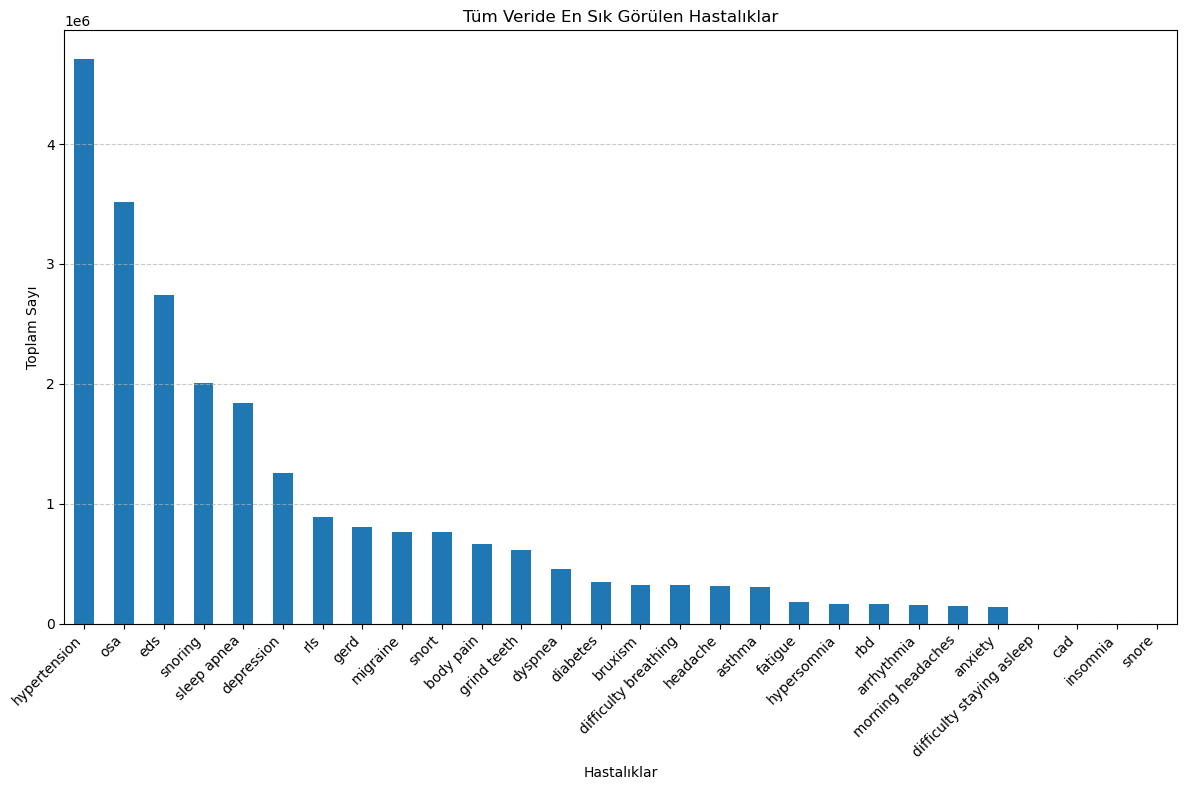

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Hastalıklar listesi
conditions = [
    'asthma', 'body pain', 'gerd', 'hypertension', 'sleep apnea', 'arrhythmia',
    'depression', 'dyspnea', 'diabetes', 'cad', 'anxiety', 'migraine',
    'osa', 'snoring', 'difficulty breathing', 'difficulty staying asleep',
    'snort', 'rls', 'eds', 'rbd', 'hypersomnia', 'grind teeth', 'insomnia',
    'fatigue', 'morning headaches', 'bruxism', 'snore', 'headache'
]

# Hastalık durumlarını birleştirmek için toplamları tutacak sözlük
condition_counts = {condition: 0 for condition in conditions}

# Tüm veriyi dolaş ve hastalıkların toplamını hesapla
for patient, data in tqdm(train_set1.items()):
    for condition in conditions:
        if condition in data.columns:  # Eğer hastalık sütunu varsa
            condition_counts[condition] += data[condition].sum()

# Hastalık durumlarını sıralı bir şekilde DataFrame'e çevir
condition_df = pd.DataFrame.from_dict(condition_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# Görselleştirme
plt.figure(figsize=(12, 8))
condition_df.plot(kind='bar', legend=False, figsize=(12, 8))
plt.title("Tüm Veride En Sık Görülen Hastalıklar")
plt.xlabel("Hastalıklar")
plt.ylabel("Toplam Sayı")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
top_10_patients

['S082',
 'S087',
 'S096',
 'S055',
 'S095',
 'S017',
 'S072',
 'S090',
 'S007',
 'S088']

In [10]:
rng = np.random.default_rng(seed = 30)
test_validation_indexes = rng.random(30)
a, b = 0, len(patient_records.keys())  # Example range
test_validation_indexes = np.floor(a + (b - a) * test_validation_indexes)
test_validation_indexes = [int(i) for i in test_validation_indexes]

validation_indexes = test_validation_indexes[:15]
test_indexes = test_validation_indexes[15:]
print(validation_indexes,test_indexes)

[23, 42, 9, 58, 76, 85, 31, 10, 39, 57, 24, 63, 88, 38, 46] [75, 59, 72, 49, 86, 15, 58, 9, 94, 42, 11, 88, 91, 23, 31]


In [11]:
for index in test_indexes:  # test_indexes içindeki indeksler
    key = f"S{index:03}"  # Sayıları 'SXXX' formatına dönüştür (örneğin 76 -> 'S076')
    
    if key in patient_records:  # Anahtar sözlükte var mı kontrol et
        print(f"Test - Index {key}:")
        df = patient_records[key]  # Sözlükten doğru anahtara göre veri al
        print(df["Sleep_Stage"].value_counts())  # Sleep_Stage sınıf dağılımını yazdır
    else:
        print(f"Key '{key}' not found in patient_records!")




Test - Index S075:
Sleep_Stage
N2    39841
P     29184
W     19392
R      6336
N1     4128
N3      192
Name: count, dtype: int64
Test - Index S059:
Sleep_Stage
N1    29088
W     23520
N2    23136
P     20964
R      2784
N3      288
Name: count, dtype: int64
Test - Index S072:
Sleep_Stage
W     42048
P     29847
N2    15456
N1    12864
Name: count, dtype: int64
Test - Index S049:
Sleep_Stage
N2    52416
P     30957
W     13536
R      8160
N1     2112
Name: count, dtype: int64
Test - Index S086:
Sleep_Stage
N2    37249
P     22608
W     22368
N1    12576
R      7680
Name: count, dtype: int64
Test - Index S015:
Sleep_Stage
N2    52512
P     27002
R     18240
N3     7200
N1     6912
W      6816
Name: count, dtype: int64
Test - Index S058:
Sleep_Stage
W     26496
N2    26112
P     24580
N1    23616
Name: count, dtype: int64
Test - Index S009:
Sleep_Stage
N2    39264
W     24192
P     20941
R      7296
N1     6432
N3      288
Name: count, dtype: int64
Test - Index S094:
Sleep_Stage
N2    512

In [19]:
list(train_set1.keys())

['S083',
 'S029',
 'S084',
 'S091',
 'S096',
 'S069',
 'S058',
 'S018',
 'S068',
 'S097',
 'S090',
 'S085',
 'S028',
 'S082',
 'S019',
 'S059',
 'S054',
 'S006',
 'S053',
 'S013',
 'S046',
 'S014',
 'S100',
 'S088',
 'S022',
 'S025',
 'S070',
 'S030',
 'S065',
 'S037',
 'S062',
 'S040',
 'S015',
 'S047',
 'S012',
 'S052',
 'S007',
 'S055',
 'S063',
 'S036',
 'S064',
 'S031',
 'S071',
 'S024',
 'S076',
 'S023',
 'S089',
 'S101',
 'S010',
 'S045',
 'S017',
 'S042',
 'S002',
 'S057',
 'S005',
 'S050',
 'S033',
 'S066',
 'S099',
 'S034',
 'S061',
 'S103',
 'S021',
 'S074',
 'S026',
 'S073',
 'S051',
 'S004',
 'S056',
 'S003',
 'S043',
 'S016',
 'S044',
 'S011',
 'S072',
 'S075',
 'S020',
 'S102',
 'S035',
 'S098',
 'S067',
 'S032',
 'S038',
 'S092',
 'S095',
 'S080',
 'S078',
 'S087',
 'S049',
 'S009',
 'S086',
 'S079',
 'S081',
 'S094',
 'S093',
 'S039',
 'S008',
 'S048']

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [11]:
# Verilen N3 değeri 0 olan hastalar
n3_zero_patients = ['S083', 'S029', 'S084', 'S058', 'S018', 'S068', 'S085', 'S082', 'S019', 'S053', 'S088', 'S022', 'S025', 'S070', 'S037', 'S062', 'S047', 'S012', 'S055', 'S063', 'S064', 'S071', 'S024', 'S089', 'S101', 'S010', 'S045', 'S017', 'S002', 'S057', 'S021', 'S074', 'S051', 'S056', 'S043', 'S016', 'S072', 'S067', 'S032', 'S038', 'S080', 'S078', 'S087', 'S049', 'S086', 'S079', 'S093', 'S039', 'S048']

# Tüm hastaların anahtarlarını al
all_patients = list(train_set1.keys())

# N3 değeri 0 olan hastalar zaten train için seçiliyor
train_keys = set(n3_zero_patients)

# Kalan hastalar
remaining_keys = [key for key in all_patients if key not in train_keys]

# Kalanlardan rastgele 20 tane daha train için seç
random_train_keys = random.sample(remaining_keys, 20)
train_keys.update(random_train_keys)

# Test için kalanlar
test_keys = [key for key in all_patients if key not in train_keys]

# Train ve test DataFrame'lerini oluştur
train_data = pd.concat([train_set1[key] for key in train_keys], axis=0)
test_data = pd.concat([train_set1[key] for key in test_keys], axis=0)

# X ve y ayrımı yap
X_train = train_data.drop(columns=['Sleep_Stage'])
y_train = train_data['Sleep_Stage']
X_test = test_data.drop(columns=['Sleep_Stage'])
y_test = test_data['Sleep_Stage']

# Sonuçları kontrol etmek için bazı çıktılar
print(f"Training set keys: {sorted(train_keys)}")
print(f"Testing set keys: {sorted(test_keys)}")
print(f"Training set size: {len(train_data)}")
print(f"Testing set size: {len(test_data)}")

Training set keys: ['S002', 'S003', 'S004', 'S005', 'S008', 'S010', 'S012', 'S013', 'S014', 'S016', 'S017', 'S018', 'S019', 'S020', 'S021', 'S022', 'S024', 'S025', 'S026', 'S029', 'S030', 'S032', 'S037', 'S038', 'S039', 'S040', 'S043', 'S045', 'S046', 'S047', 'S048', 'S049', 'S050', 'S051', 'S053', 'S055', 'S056', 'S057', 'S058', 'S062', 'S063', 'S064', 'S065', 'S067', 'S068', 'S070', 'S071', 'S072', 'S073', 'S074', 'S075', 'S076', 'S078', 'S079', 'S080', 'S082', 'S083', 'S084', 'S085', 'S086', 'S087', 'S088', 'S089', 'S090', 'S093', 'S094', 'S099', 'S100', 'S101']
Testing set keys: ['S006', 'S007', 'S009', 'S011', 'S015', 'S023', 'S028', 'S031', 'S033', 'S034', 'S035', 'S036', 'S042', 'S044', 'S052', 'S054', 'S059', 'S061', 'S066', 'S069', 'S081', 'S091', 'S092', 'S095', 'S096', 'S097', 'S098', 'S102', 'S103']
Training set size: 10525091
Testing set size: 4560019


In [12]:
print(f"Training set keys: {len(train_keys)}")
print(f"Testing set keys: {len(test_keys)}")

Training set keys: 69
Testing set keys: 29


In [32]:
# Model tanımı (warm_start=True ile)
rf_classifier = RandomForestClassifier(
    n_estimators=1,  # Başlangıçta 1 ağaç
    criterion='gini',
    max_depth=48,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    n_jobs=-1,
    warm_start=True,  # Warm start etkin
    random_state=42
)

# Döngüsel eğitim
total_estimators = 100
with tqdm(total=total_estimators, desc="Training Progress") as pbar:
    for i in range(1, total_estimators + 1):
        rf_classifier.set_params(n_estimators=i)  # Toplam ağaç sayısını artır
        rf_classifier.fit(X_train, y_train)  # Modeli mevcut verilerle eğit
        pbar.update(1)

# Test setinde değerlendirme
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Performans ölçütleri
print(f"Test Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Training Progress:   0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
Training Progress:   1%|          | 1/100 [00:34<57:41, 34.96s/it]/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enou

Test Accuracy: 0.2879
Confusion Matrix:
[[   1781   61552       0      74  432725]
 [   5959  380823       0     882 1924983]
 [    319   63900       0       0  211877]
 [  11147   72891       0       7  366580]
 [   4407   81926       0     638  927181]]
Classification Report:


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          N1       0.08      0.00      0.01    496132
          N2       0.58      0.16      0.26   2312647
          N3       0.00      0.00      0.00    276096
           R       0.00      0.00      0.00    450625
           W       0.24      0.91      0.38   1014152

    accuracy                           0.29   4549652
   macro avg       0.18      0.22      0.13   4549652
weighted avg       0.35      0.29      0.22   4549652



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Verilen N3 değeri 0 olan hastalar
n3_zero_patients2 = [ 'S062', 'S047', 'S012', 'S055', 'S063', 'S064', 'S071', 'S024', 'S089', 'S101', 'S010', 'S045', 'S017', 'S002', 'S057', 'S021', 'S074', 'S051', 'S056', 'S043', 'S016', 'S072', 'S067', 'S032', 'S038', 'S080', 'S078', 'S087', 'S049', 'S086', 'S079', 'S093', 'S039', 'S048']

# Tüm hastaların anahtarlarını al
all_patients2 = list(train_set2.keys())

# N3 değeri 0 olan hastalar zaten train için seçiliyor
train_keys2 = set(n3_zero_patients2)

# Kalan hastalar
remaining_keys2 = [key for key in all_patients2 if key not in train_keys2]

# Kalanlardan rastgele 20 tane daha train için seç
random_train_keys2 = random.sample(remaining_keys2, 35)
train_keys2.update(random_train_keys2)

# Test için kalanlar
test_keys2 = [key for key in all_patients2 if key not in train_keys2]

# Train ve test DataFrame'lerini oluştur
train_data2 = pd.concat([train_set2[key] for key in train_keys2], axis=0)
test_data2 = pd.concat([train_set2[key] for key in test_keys2], axis=0)

# X ve y ayrımı yap
X_train2 = train_data2.drop(columns=['Sleep_Stage'])
y_train2 = train_data2['Sleep_Stage']
X_test2 = test_data2.drop(columns=['Sleep_Stage'])
y_test2 = test_data2['Sleep_Stage']

# Sonuçları kontrol etmek için bazı çıktılar
print(f"Training set keys: {sorted(train_keys2)}")
print(f"Testing set keys: {sorted(test_keys2)}")
print(f"Training set size: {len(train_data2)}")
print(f"Testing set size: {len(test_data2)}")

Training set keys: ['S002', 'S005', 'S006', 'S010', 'S012', 'S013', 'S014', 'S015', 'S016', 'S017', 'S018', 'S019', 'S020', 'S021', 'S023', 'S024', 'S025', 'S028', 'S031', 'S032', 'S033', 'S035', 'S036', 'S037', 'S038', 'S039', 'S040', 'S043', 'S044', 'S045', 'S047', 'S048', 'S049', 'S051', 'S052', 'S053', 'S055', 'S056', 'S057', 'S059', 'S062', 'S063', 'S064', 'S065', 'S067', 'S068', 'S071', 'S072', 'S073', 'S074', 'S075', 'S078', 'S079', 'S080', 'S082', 'S084', 'S086', 'S087', 'S089', 'S090', 'S093', 'S094', 'S095', 'S097', 'S099', 'S100', 'S101', 'S102', 'S103']
Testing set keys: ['S003', 'S004', 'S007', 'S008', 'S009', 'S011', 'S022', 'S026', 'S029', 'S030', 'S034', 'S042', 'S046', 'S050', 'S054', 'S058', 'S061', 'S066', 'S069', 'S070', 'S076', 'S081', 'S083', 'S085', 'S088', 'S091', 'S092', 'S096', 'S098']
Training set size: 14058191
Testing set size: 5850458


In [34]:
# Model tanımı (warm_start=True ile)
rf_classifier2 = RandomForestClassifier(
    n_estimators=1,  # Başlangıçta 1 ağaç
    criterion='gini',
    max_depth=48,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    n_jobs=-1,
    warm_start=True,  # Warm start etkin
    random_state=42
)

# Döngüsel eğitim
total_estimators = 100
with tqdm(total=total_estimators, desc="Training Progress") as pbar:
    for i in range(1, total_estimators + 1):
        rf_classifier2.set_params(n_estimators=i)  # Toplam ağaç sayısını artır
        rf_classifier2.fit(X_train2, y_train2)  # Modeli mevcut verilerle eğit
        pbar.update(1)

# Test setinde değerlendirme
y_pred2 = rf_classifier2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)

# Performans ölçütleri
print(f"Test Accuracy: {accuracy2:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test2, y_pred2))
print("Classification Report:")
print(classification_report(y_test2, y_pred2))

Training Progress:   0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
Training Progress:   1%|          | 1/100 [01:00<1:39:26, 60.27s/it]/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:777: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large en

Test Accuracy: 0.4327
Confusion Matrix:
[[   9363   64421       0   27348    2332  359643]
 [  62993  306136       0   50264   10760 1743869]
 [    761   50432       0    3730    2768  170405]
 [      0     789       0 1331839       0   57407]
 [  11287   63596       0       0     657  394670]
 [  18164   99411       0  137851     869  894560]]
Classification Report:


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          N1       0.09      0.02      0.03    463107
          N2       0.52      0.14      0.22   2174022
          N3       0.00      0.00      0.00    228096
           P       0.86      0.96      0.91   1390035
           R       0.04      0.00      0.00    470210
           W       0.25      0.78      0.37   1150855

    accuracy                           0.43   5876325
   macro avg       0.29      0.32      0.26   5876325
weighted avg       0.46      0.43      0.37   5876325



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
# Tüm hastaların anahtarlarını al
all_patients3 = list(train_set2.keys())

# Rastgele 68 tane train için seç
random_train_keys3 = random.sample(all_patients3, 68)

# Test için kalan 30 key
remaining_keys3 = [key for key in all_patients3 if key not in random_train_keys3]
test_keys3 = random.sample(remaining_keys3, 30)

# Train ve test DataFrame'lerini oluştur
train_data3 = pd.concat([train_set2[key] for key in random_train_keys3], axis=0)
test_data3 = pd.concat([train_set2[key] for key in test_keys3], axis=0)

# X ve y ayrımı yap
X_train3 = train_data3.drop(columns=['Sleep_Stage'])
y_train3 = train_data3['Sleep_Stage']
X_test3 = test_data3.drop(columns=['Sleep_Stage'])
y_test3 = test_data3['Sleep_Stage']

# Sonuçları kontrol etmek için bazı çıktılar
print(f"Training set keys: {sorted(random_train_keys3)}")
print(f"Testing set keys: {sorted(test_keys3)}")
print(f"Training set size: {len(train_data3)}")
print(f"Testing set size: {len(test_data3)}")

Training set keys: ['S002', 'S003', 'S004', 'S008', 'S009', 'S010', 'S012', 'S014', 'S015', 'S017', 'S018', 'S019', 'S020', 'S021', 'S023', 'S024', 'S025', 'S026', 'S028', 'S030', 'S033', 'S035', 'S036', 'S037', 'S038', 'S040', 'S043', 'S044', 'S045', 'S046', 'S047', 'S048', 'S049', 'S050', 'S052', 'S054', 'S055', 'S056', 'S057', 'S059', 'S061', 'S064', 'S065', 'S067', 'S068', 'S073', 'S074', 'S075', 'S076', 'S078', 'S080', 'S081', 'S082', 'S083', 'S084', 'S085', 'S086', 'S087', 'S090', 'S091', 'S092', 'S094', 'S095', 'S097', 'S099', 'S100', 'S101', 'S102']
Testing set keys: ['S005', 'S006', 'S007', 'S011', 'S013', 'S016', 'S022', 'S029', 'S031', 'S032', 'S034', 'S039', 'S042', 'S051', 'S053', 'S058', 'S062', 'S063', 'S066', 'S069', 'S070', 'S071', 'S072', 'S079', 'S088', 'S089', 'S093', 'S096', 'S098', 'S103']
Training set size: 13820132
Testing set size: 6088517


In [13]:
# Tüm hastaların anahtarlarını al
all_patients4 = list(train_set1.keys())

random_train_keys4 = random.sample(all_patients4, 68)

# Kalan hastalar
remaining_keys4 = [key for key in all_patients4 if key not in random_train_keys4]
test_keys4 = random.sample(remaining_keys4, 30)


# Train ve test DataFrame'lerini oluştur
train_data4 = pd.concat([train_set1[key] for key in random_train_keys4], axis=0)
test_data4 = pd.concat([train_set1[key] for key in test_keys4], axis=0)

# X ve y ayrımı yap
X_train4 = train_data4.drop(columns=['Sleep_Stage'])
y_train4 = train_data4['Sleep_Stage']
X_test4 = test_data4.drop(columns=['Sleep_Stage'])
y_test4 = test_data4['Sleep_Stage']

# Sonuçları kontrol etmek için bazı çıktılar
print(f"Training set keys: {sorted(remaining_keys4)}")
print(f"Testing set keys: {sorted(test_keys4)}")
print(f"Training set size: {len(train_data4)}")
print(f"Testing set size: {len(test_data4)}")

Training set keys: ['S002', 'S006', 'S013', 'S014', 'S022', 'S024', 'S026', 'S029', 'S039', 'S040', 'S042', 'S049', 'S050', 'S051', 'S052', 'S054', 'S055', 'S058', 'S059', 'S061', 'S067', 'S070', 'S074', 'S076', 'S080', 'S084', 'S085', 'S094', 'S095', 'S101']
Testing set keys: ['S002', 'S006', 'S013', 'S014', 'S022', 'S024', 'S026', 'S029', 'S039', 'S040', 'S042', 'S049', 'S050', 'S051', 'S052', 'S054', 'S055', 'S058', 'S059', 'S061', 'S067', 'S070', 'S074', 'S076', 'S080', 'S084', 'S085', 'S094', 'S095', 'S101']
Training set size: 10459043
Testing set size: 4626067


In [23]:
# Tüm hastaların anahtarlarını al
all_patients5 = list(train_set3.keys())

random_train_keys5 = random.sample(all_patients5, 68)

# Kalan hastalar
remaining_keys5 = [key for key in all_patients5 if key not in random_train_keys5]
test_keys5 = random.sample(remaining_keys5, 30)


# Train ve test DataFrame'lerini oluştur
train_data5 = pd.concat([train_set3[key] for key in random_train_keys5], axis=0)
test_data5 = pd.concat([train_set3[key] for key in test_keys5], axis=0)

# X ve y ayrımı yap
X_train5 = train_data5.drop(columns=['Sleep_Stage'])
y_train5 = train_data5['Sleep_Stage']
X_test5 = test_data5.drop(columns=['Sleep_Stage'])
y_test5 = test_data5['Sleep_Stage']

# Sonuçları kontrol etmek için bazı çıktılar
print(f"Training set keys: {sorted(remaining_keys5)}")
print(f"Testing set keys: {sorted(test_keys5)}")
print(f"Training set size: {len(train_data5)}")
print(f"Testing set size: {len(test_data5)}")

Training set keys: ['S003', 'S006', 'S010', 'S013', 'S016', 'S017', 'S022', 'S032', 'S033', 'S038', 'S040', 'S042', 'S043', 'S053', 'S055', 'S056', 'S058', 'S069', 'S072', 'S075', 'S079', 'S086', 'S089', 'S090', 'S091', 'S092', 'S097', 'S098', 'S100', 'S102']
Testing set keys: ['S003', 'S006', 'S010', 'S013', 'S016', 'S017', 'S022', 'S032', 'S033', 'S038', 'S040', 'S042', 'S043', 'S053', 'S055', 'S056', 'S058', 'S069', 'S072', 'S075', 'S079', 'S086', 'S089', 'S090', 'S091', 'S092', 'S097', 'S098', 'S100', 'S102']
Training set size: 10097506
Testing set size: 4469204


In [12]:
# Tüm hastaların anahtarlarını al
all_patients6 = list(train_set4.keys())

random_train_keys6 = random.sample(all_patients6, 68)

# Kalan hastalar
remaining_keys6 = [key for key in all_patients6 if key not in random_train_keys6]
test_keys6 = random.sample(remaining_keys6, 30)


# Train ve test DataFrame'lerini oluştur
train_data6 = pd.concat([train_set4[key] for key in random_train_keys6], axis=0)
test_data6 = pd.concat([train_set4[key] for key in test_keys6], axis=0)

# X ve y ayrımı yap
X_train6 = train_data6.drop(columns=['Sleep_Stage'])
y_train6 = train_data6['Sleep_Stage']
X_test6 = test_data6.drop(columns=['Sleep_Stage'])
y_test6 = test_data6['Sleep_Stage']

# Sonuçları kontrol etmek için bazı çıktılar
print(f"Training set keys: {sorted(remaining_keys6)}")
print(f"Testing set keys: {sorted(test_keys6)}")
print(f"Training set size: {len(train_data6)}")
print(f"Testing set size: {len(test_data6)}")

Training set keys: ['S006', 'S008', 'S009', 'S010', 'S011', 'S020', 'S024', 'S025', 'S032', 'S043', 'S050', 'S053', 'S057', 'S059', 'S062', 'S063', 'S064', 'S068', 'S070', 'S071', 'S083', 'S087', 'S088', 'S092', 'S093', 'S094', 'S095', 'S096', 'S097', 'S101']
Testing set keys: ['S006', 'S008', 'S009', 'S010', 'S011', 'S020', 'S024', 'S025', 'S032', 'S043', 'S050', 'S053', 'S057', 'S059', 'S062', 'S063', 'S064', 'S068', 'S070', 'S071', 'S083', 'S087', 'S088', 'S092', 'S093', 'S094', 'S095', 'S096', 'S097', 'S101']
Training set size: 13862154
Testing set size: 6046495


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import multiprocessing
from tqdm import tqdm

# Multiprocessing bağlamını spawn olarak ayarla
multiprocessing.set_start_method("spawn", force=True)

# K-Fold Cross-Validation için hazırlık
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Performans metriklerini tutmak için listeler
accuracy_scores = []
classification_reports = []
confusion_matrices = []

# LabelEncoder oluştur
label_encoder = LabelEncoder()

# Tüm hastaların anahtarlarını al
all_patients7 = list(train_set2.keys())

# K-Fold işlemi
fold_index = 1
for train_indices, test_indices in tqdm(kf.split(all_patients7), desc="K-Fold Cross-Validation"):
    # Eğitim ve test anahtarlarını belirle
    train_keys7 = [all_patients7[i] for i in train_indices]
    test_keys7 = [all_patients7[i] for i in test_indices]

    # Eğitim ve test verilerini birleştir
    train_data7 = pd.concat([train_set2[key] for key in train_keys7], axis=0)
    test_data7 = pd.concat([train_set2[key] for key in test_keys7], axis=0)

    # X ve y ayrımı yap
    X_train7 = train_data7.drop(columns=['Sleep_Stage'])
    y_train7 = train_data7['Sleep_Stage']
    X_test7 = test_data7.drop(columns=['Sleep_Stage'])
    y_test7 = test_data7['Sleep_Stage']

    # LabelEncoder ile sınıf etiketlerini dönüştür
    y_train_encoded = label_encoder.fit_transform(y_train7)
    y_test_encoded = label_encoder.transform(y_test7)

    # Dönüşüm sonucu eşleştirme tablosunu yazdır (isteğe bağlı)
    if fold_index == 1:  # Sadece ilk fold için eşleştirme tablosunu yazdır
        print("Class Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

    # Özellikleri ölçeklendirme
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train7)
    X_test_scaled = scaler.transform(X_test7)

    # Logistic Regression modeli
    logreg_classifier = LogisticRegression(
        solver='lbfgs',
        penalty='l2',
        max_iter=1000,
        random_state=42,
        n_jobs=-1
    )

    # Modeli eğitme
    logreg_classifier.fit(X_train_scaled, y_train_encoded)

    # Test setinde değerlendirme
    y_pred_logreg = logreg_classifier.predict(X_test_scaled)

    # Performans ölçütleri
    accuracy = accuracy_score(y_test_encoded, y_pred_logreg)
    accuracy_scores.append(accuracy)

    classification_reports.append(classification_report(y_test_encoded, y_pred_logreg, output_dict=True))
    confusion_matrices.append(confusion_matrix(y_test_encoded, y_pred_logreg))

    print(f"Fold {fold_index} Accuracy: {accuracy:.4f}")
    fold_index += 1

# Genel performans raporu
print("\nK-Fold Cross-Validation Results:")
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")

K-Fold Cross-Validation: 0it [00:00, ?it/s]

Class Mapping: {'N1': 0, 'N2': 1, 'N3': 2, 'P': 3, 'R': 4, 'W': 5}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
K-Fold Cross-Validation: 1it [03:08, 

Fold 1 Accuracy: 0.6018


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
K-Fold Cross-Validation: 2it [06:32, 

Fold 2 Accuracy: 0.6132


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
K-Fold Cross-Validation: 3it [09:56, 

Fold 3 Accuracy: 0.6069


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
K-Fold Cross-Validation: 4it [13:19, 

Fold 4 Accuracy: 0.6331


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
K-Fold Cross-Validation: 5it [15:58, 

Fold 5 Accuracy: 0.5932

K-Fold Cross-Validation Results:
Average Accuracy: 0.6096 ± 0.0135


In [18]:
# Classification reports yazdırma
print("\nClassification Reports for Each Fold:\n")
for fold_index, report in enumerate(classification_reports, 1):
    print(f"Fold {fold_index} Classification Report:")
    # Classification report'u DataFrame'e dönüştürerek düzenli yazdır
    report_df = pd.DataFrame(report).transpose()
    print(report_df)
    print("\n" + "="*50 + "\n")

# Confusion matrices yazdırma
print("Confusion Matrices for Each Fold:\n")
for fold_index, matrix in enumerate(confusion_matrices, 1):
    print(f"Fold {fold_index} Confusion Matrix:")
    print(pd.DataFrame(matrix))  # Confusion matrix'i DataFrame olarak yazdır
    print("\n" + "="*50 + "\n")


Classification Reports for Each Fold:

Fold 1 Classification Report:
              precision    recall  f1-score       support
0              0.002121  0.000011  0.000022  3.665300e+05
1              0.505201  0.942652  0.657841  1.516614e+06
2              0.000000  0.000000  0.000000  1.443840e+05
3              0.897120  0.940701  0.918394  9.847670e+05
4              0.313275  0.012844  0.024676  3.502090e+05
5              0.464228  0.125636  0.197753  7.077190e+05
accuracy       0.601792  0.601792  0.601792  6.017918e-01
macro avg      0.363658  0.336974  0.299781  4.070223e+06
weighted avg   0.513162  0.601792  0.503830  4.070223e+06


Fold 2 Classification Report:
              precision    recall  f1-score       support
0              0.000000  0.000000  0.000000  3.281310e+05
1              0.534545  0.939521  0.681402  1.599552e+06
2              0.000000  0.000000  0.000000  1.165440e+05
3              0.842779  0.979159  0.905865  9.256580e+05
4              0.402864  0.0

In [29]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Geçiş matrisini hesaplama fonksiyonu
def calculate_transition_matrix(sleep_stages):
    transitions = list(zip(sleep_stages[:-1], sleep_stages[1:]))
    transition_counts = Counter(transitions)
    stages = sorted(set(sleep_stages))
    matrix = pd.DataFrame(0, index=stages, columns=stages)
    for (start, end), count in transition_counts.items():
        matrix.loc[start, end] = count
    return matrix

# Örnek bir hasta için transition matrix
patient_id = 'S083'  # Bir örnek hasta
sleep_stages = train_set2[patient_id]['Sleep_Stage'].tolist()
transition_matrix = calculate_transition_matrix(sleep_stages)
print(f"Transition Matrix for {patient_id}:\n", transition_matrix)

Transition Matrix for S083:
        N1     N2      P     R      W
N1  32919     43      0     1     61
N2     30  45652      0     0     14
P       0      0  37669     0      1
R       0      0      0  5183      1
W      75      1      0     0  64052


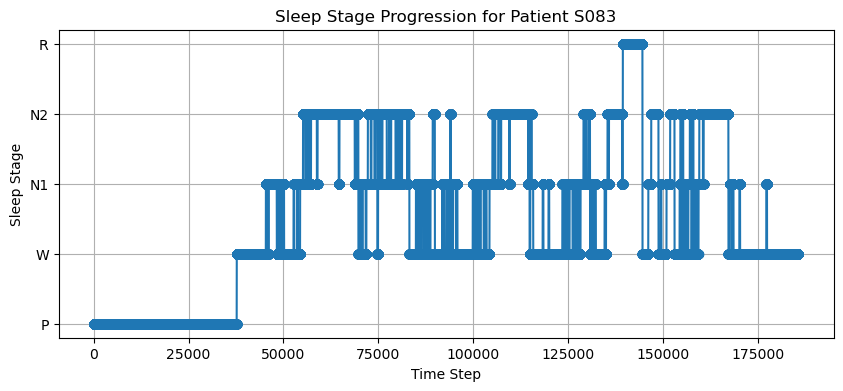

In [30]:
# Zaman serisi çizimi
def plot_sleep_stage_series(patient_id, data):
    sleep_stages = data['Sleep_Stage']
    plt.figure(figsize=(10, 4))
    plt.plot(range(len(sleep_stages)), sleep_stages, marker='o', linestyle='-')
    plt.title(f"Sleep Stage Progression for Patient {patient_id}")
    plt.xlabel("Time Step")
    plt.ylabel("Sleep Stage")
    plt.grid()
    plt.show()

# Örnek bir hasta için zaman serisi
plot_sleep_stage_series(patient_id, train_set2[patient_id])

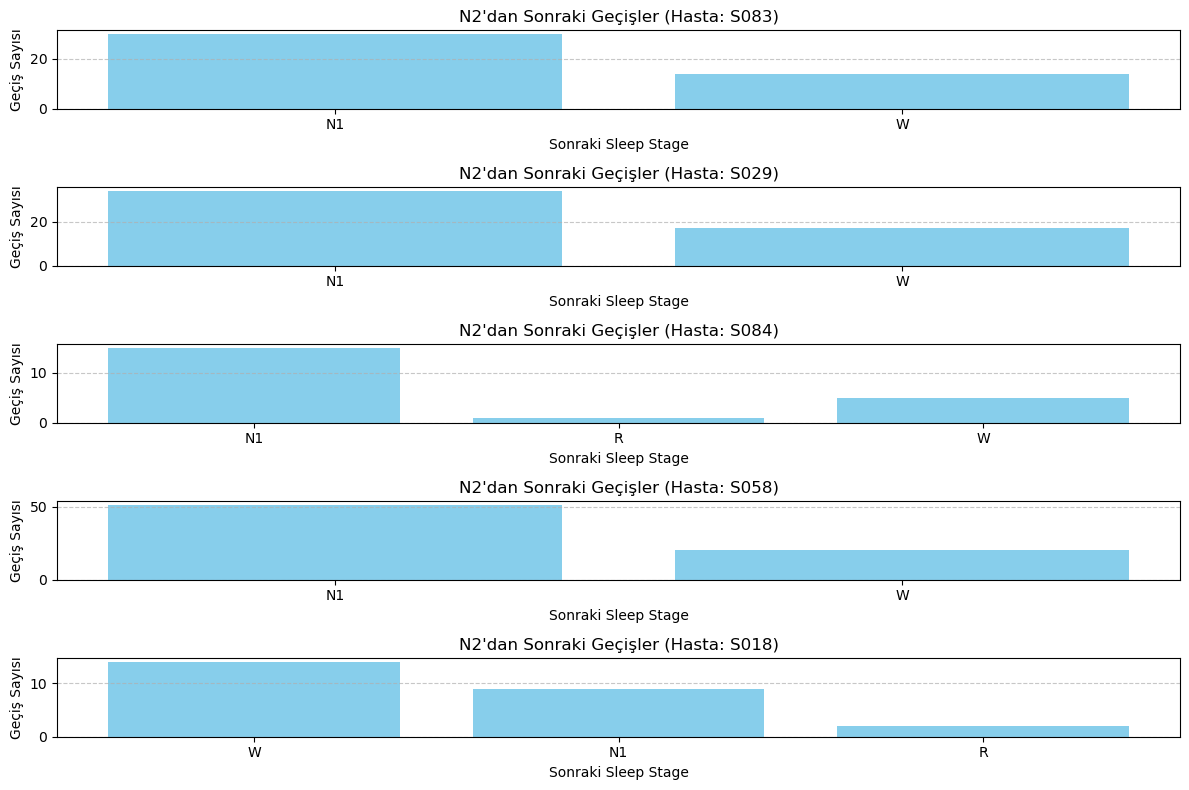

In [43]:
# Seçilen hastalar
selected_patients = ['S083', 'S029', 'S084', 'S058', 'S018']

# N2 sonrası geçişlerin analizi
n2_transitions = {patient_id: Counter() for patient_id in selected_patients}

# Her hasta için N2 sonrası geçişleri sayma
for patient_id in selected_patients:
    sleep_stages = train_set2[patient_id]['Sleep_Stage'].tolist()
    for i in range(len(sleep_stages) - 1):
        if sleep_stages[i] == 'N2' and sleep_stages[i + 1] != 'N2':
            n2_transitions[patient_id][sleep_stages[i + 1]] += 1

# Görselleştirme
plt.figure(figsize=(12, 8))

for idx, patient_id in enumerate(selected_patients, 1):
    transition_counts = n2_transitions[patient_id]
    plt.subplot(len(selected_patients), 1, idx)
    plt.bar(transition_counts.keys(), transition_counts.values(), color='skyblue')
    plt.title(f"N2'dan Sonraki Geçişler (Hasta: {patient_id})")
    plt.xlabel("Sonraki Sleep Stage")
    plt.ylabel("Geçiş Sayısı")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

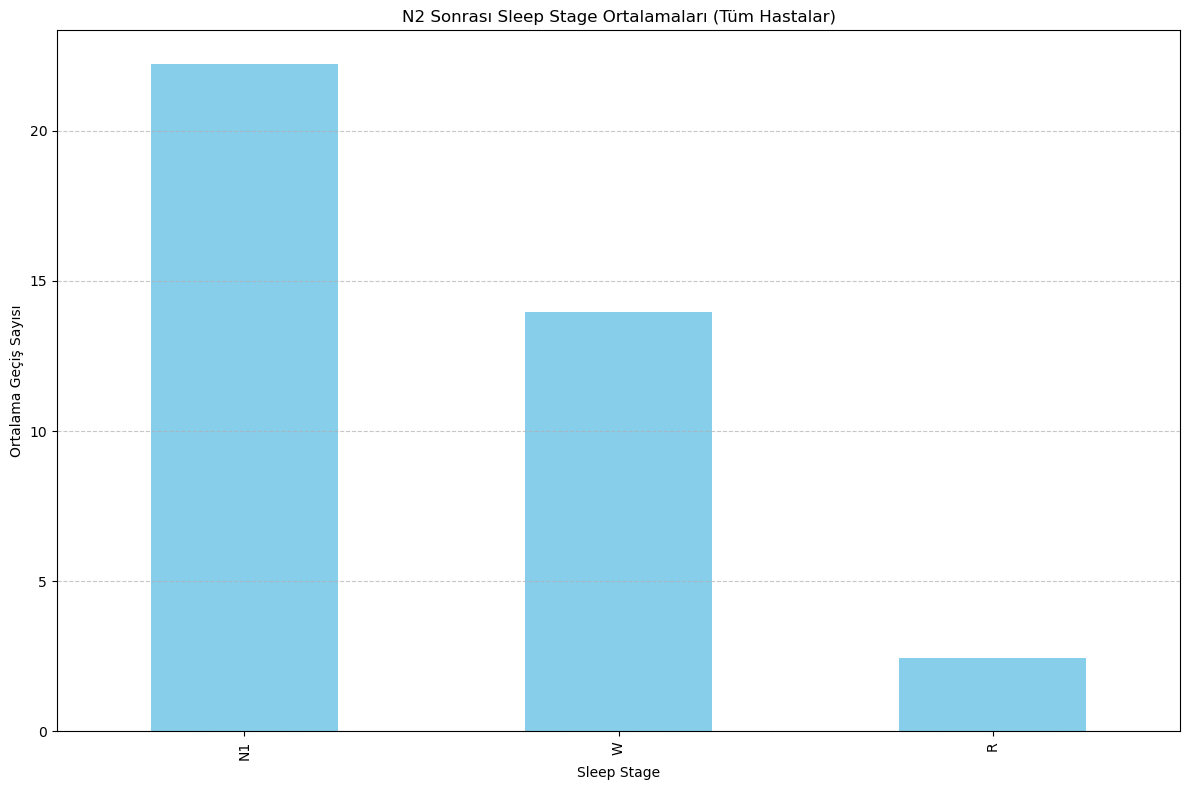

In [44]:
# İlgili hastalar
selected_patients = [
    'S083', 'S029', 'S084', 'S058', 'S018', 'S068', 'S085', 'S082', 'S019', 'S053', 'S088', 
    'S022', 'S025', 'S070', 'S037', 'S062', 'S047', 'S012', 'S055', 'S063', 'S064', 'S071', 
    'S024', 'S089', 'S101', 'S010', 'S045', 'S017', 'S002', 'S057', 'S021', 'S074', 'S051', 
    'S056', 'S043', 'S016', 'S072', 'S067', 'S032', 'S038', 'S080', 'S078', 'S087', 'S049', 
    'S086', 'S079', 'S093', 'S039', 'S048'
]

# Tüm hastalar için N2 sonrası geçişleri toplamak
total_transitions = Counter()
patient_count = 0

for patient_id in selected_patients:
    sleep_stages = train_set2[patient_id]['Sleep_Stage'].tolist()
    patient_transitions = Counter()
    for i in range(len(sleep_stages) - 1):
        if sleep_stages[i] == 'N2' and sleep_stages[i + 1] != 'N2':
            patient_transitions[sleep_stages[i + 1]] += 1
    # Eğer hasta N2'den geçiş yapmışsa hesaplamalara dahil et
    if sum(patient_transitions.values()) > 0:
        total_transitions.update(patient_transitions)
        patient_count += 1

# Ortalamayı hesaplama
average_transitions = {stage: count / patient_count for stage, count in total_transitions.items()}

# Ortalamaları DataFrame'e dönüştürme ve sıralama
average_transitions_df = pd.DataFrame.from_dict(average_transitions, orient='index', columns=['Average']).sort_values(by='Average', ascending=False)

# Görselleştirme
plt.figure(figsize=(10, 6))
average_transitions_df.plot(kind='bar', legend=False, color='skyblue', figsize=(12, 8))
plt.title("N2 Sonrası Sleep Stage Ortalamaları (Tüm Hastalar)")
plt.xlabel("Sleep Stage")
plt.ylabel("Ortalama Geçiş Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [45]:
# N2'den sonra N1 ve W'ye geçen hastaları tutmak için listeler
n2_to_n1_patients = []
n2_to_w_patients = []

# Her hasta için geçişleri kontrol et
for patient_id in selected_patients:
    sleep_stages = train_set2[patient_id]['Sleep_Stage'].tolist()
    # N2 sonrası geçişleri kontrol et
    for i in range(len(sleep_stages) - 1):
        if sleep_stages[i] == 'N2':
            if sleep_stages[i + 1] == 'N1':
                n2_to_n1_patients.append(patient_id)
                break  # Bu hasta listede zaten varsa tekrar ekleme
            elif sleep_stages[i + 1] == 'W':
                n2_to_w_patients.append(patient_id)
                break  # Bu hasta listede zaten varsa tekrar ekleme

# Sonuçları yazdır
print("N2'den sonra N1'e geçen hastalar:")
print(n2_to_n1_patients)

print("\nN2'den sonra W'ye geçen hastalar:")
print(n2_to_w_patients)

N2'den sonra N1'e geçen hastalar:
['S083', 'S029', 'S084', 'S058', 'S068', 'S019', 'S022', 'S070', 'S047', 'S012', 'S063', 'S071', 'S089', 'S010', 'S045', 'S021', 'S074', 'S051', 'S016', 'S032', 'S038', 'S080', 'S078', 'S087', 'S079', 'S093', 'S039', 'S048']

N2'den sonra W'ye geçen hastalar:
['S018', 'S085', 'S082', 'S053', 'S088', 'S025', 'S037', 'S062', 'S055', 'S064', 'S024', 'S101', 'S017', 'S002', 'S057', 'S056', 'S043', 'S072', 'S067', 'S049', 'S086']


<Figure size 1200x800 with 0 Axes>

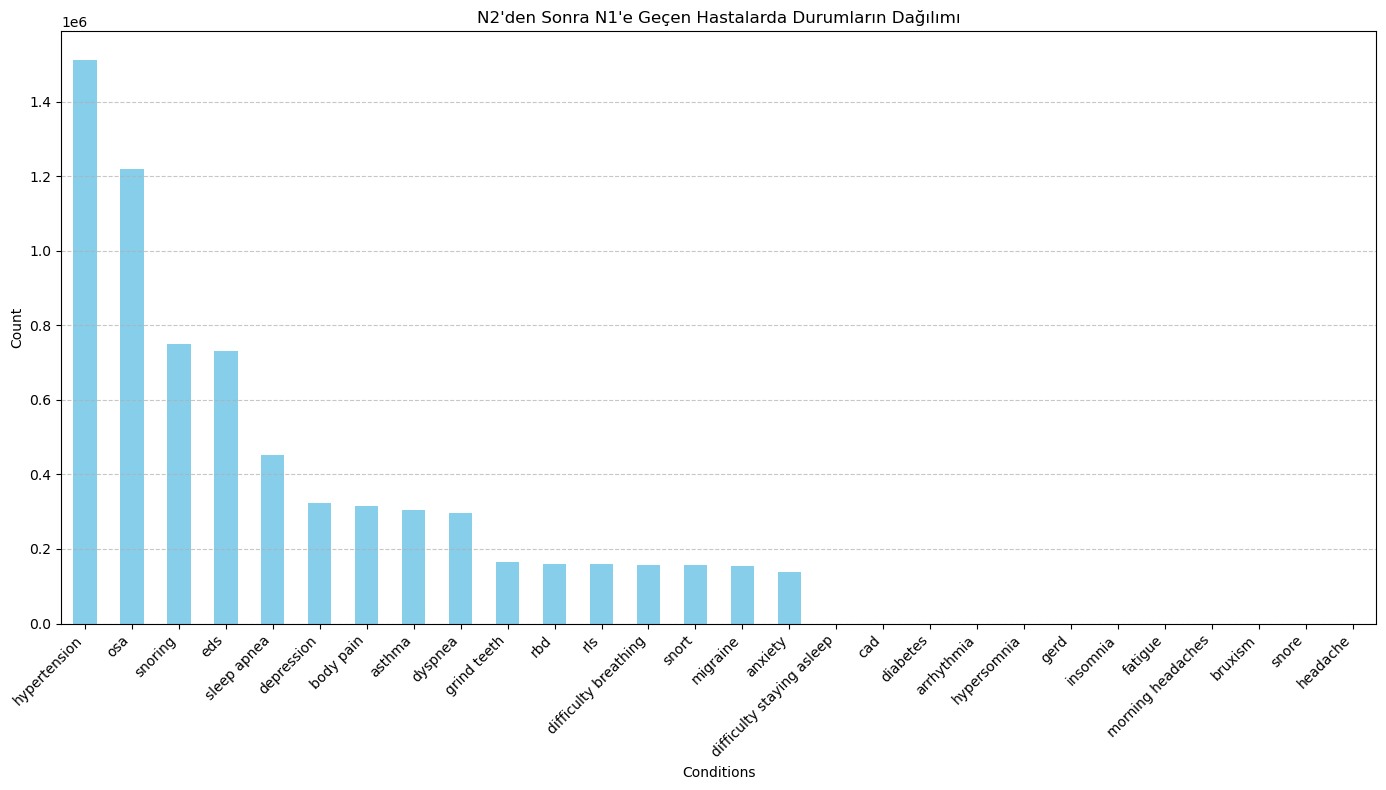

In [52]:
# İlgi alanındaki sütunlar
columns_of_interest = [
    'asthma', 'body pain', 'gerd', 'hypertension', 'sleep apnea', 'arrhythmia',
    'depression', 'dyspnea', 'diabetes', 'cad', 'anxiety', 'migraine',
    'osa', 'snoring', 'difficulty breathing', 'difficulty staying asleep',
    'snort', 'rls', 'eds', 'rbd', 'hypersomnia', 'grind teeth', 'insomnia',
    'fatigue', 'morning headaches', 'bruxism', 'snore', 'headache'
]

# Şartlı olarak hastalardaki durumları toplamak
condition_counts = {col: 0 for col in columns_of_interest}

# n2_to_n1_patients listesindeki hastalar için verileri toplama
for patient_id in n2_to_n1_patients:
    for col in columns_of_interest:
        condition_counts[col] += train_set1[patient_id][col].sum()

# Verileri bir DataFrame'e dönüştürme ve sıralama
condition_df = pd.DataFrame.from_dict(condition_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# Görselleştirme
plt.figure(figsize=(12, 8))
condition_df.plot(kind='bar', legend=False, color='skyblue', figsize=(14, 8))
plt.title("N2'den Sonra N1'e Geçen Hastalarda Durumların Dağılımı")
plt.xlabel("Conditions")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1200x800 with 0 Axes>

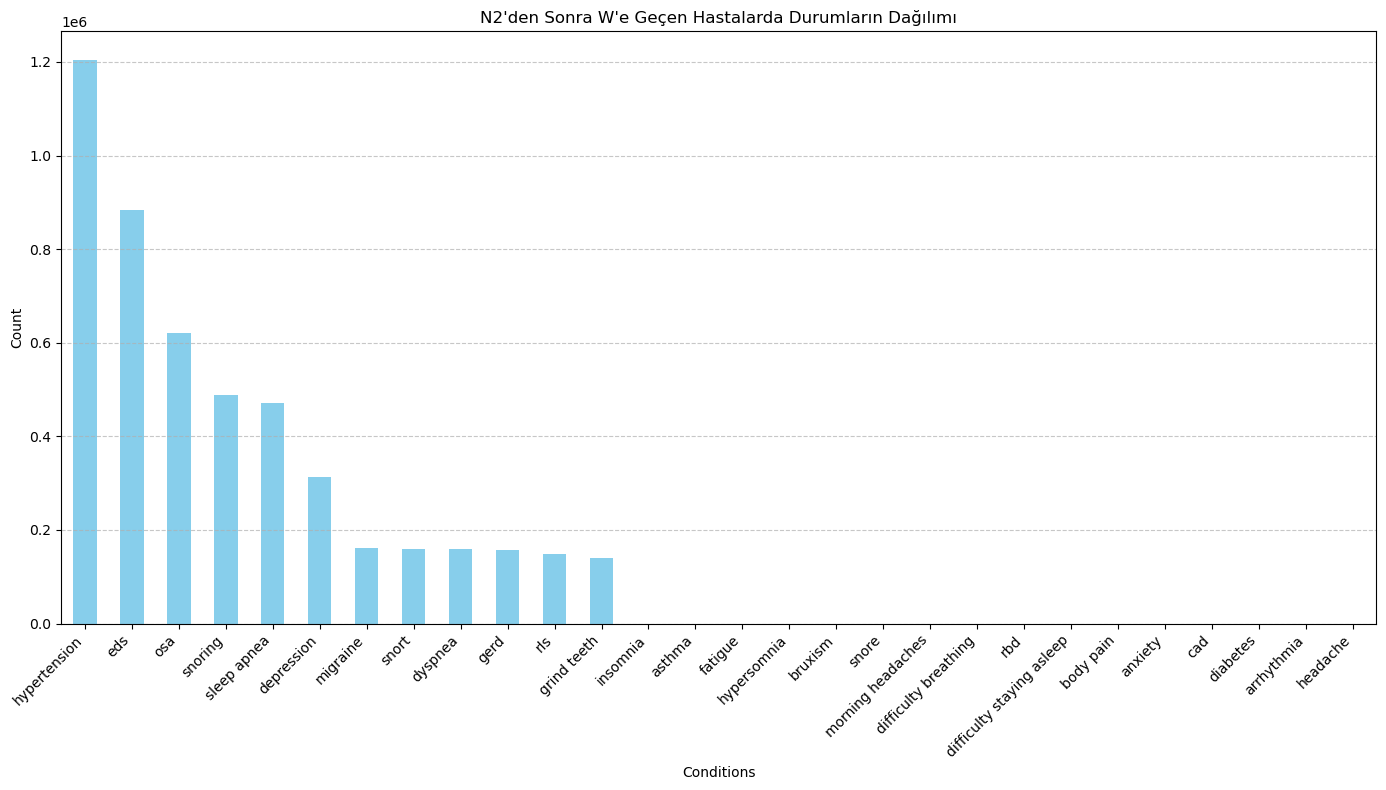

In [ ]:
# İlgi alanındaki sütunlar
columns_of_interest = [
    'asthma', 'body pain', 'gerd', 'hypertension', 'sleep apnea', 'arrhythmia',
    'depression', 'dyspnea', 'diabetes', 'cad', 'anxiety', 'migraine',
    'osa', 'snoring', 'difficulty breathing', 'difficulty staying asleep',
    'snort', 'rls', 'eds', 'rbd', 'hypersomnia', 'grind teeth', 'insomnia',
    'fatigue', 'morning headaches', 'bruxism', 'snore', 'headache'
]

# Şartlı olarak hastalardaki durumları toplamak
condition_counts = {col: 0 for col in columns_of_interest}

# n2_to_n1_patients listesindeki hastalar için verileri toplama
for patient_id in n2_to_w_patients:
    for col in columns_of_interest:
        condition_counts[col] += train_set1[patient_id][col].sum()

# Verileri bir DataFrame'e dönüştürme ve sıralama
condition_df = pd.DataFrame.from_dict(condition_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# Görselleştirme
plt.figure(figsize=(12, 8))
condition_df.plot(kind='bar', legend=False, color='skyblue', figsize=(14, 8))
plt.title("N2'den Sonra W'e Geçen Hastalarda Durumların Dağılımı")
plt.xlabel("Conditions")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

W'e Geçmeden Önceki (W Hariç) Sleep Stage'ler ve Frekansları:
N2: 1445
N1: 1229
R: 336
P: 96
N3: 30


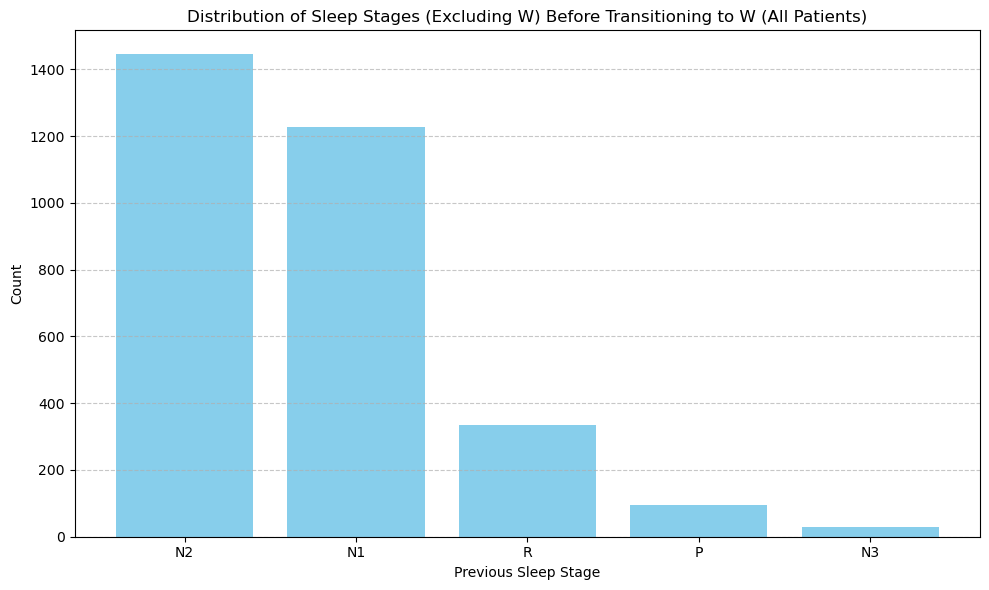

In [55]:
# W'ye geçmeden önceki sleep stage'leri toplamak
w_previous_stages = Counter()

# Tüm hastalar için geçiş analizi
for patient_id, df in train_set2.items():
    sleep_stages = df['Sleep_Stage'].tolist()
    for i in range(1, len(sleep_stages)):
        if sleep_stages[i] == 'W' and sleep_stages[i - 1] != 'W':  # W'ye geçiş ve W dışındaki stage
            w_previous_stages[sleep_stages[i - 1]] += 1  # Bir önceki stage'i say

# Verileri sıralama
w_previous_stages_sorted = dict(sorted(w_previous_stages.items(), key=lambda x: x[1], reverse=True))

# Yalnızca W dışındakileri yazdır
print("W'e Geçmeden Önceki (W Hariç) Sleep Stage'ler ve Frekansları:")
for stage, count in w_previous_stages_sorted.items():
    print(f"{stage}: {count}")

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(w_previous_stages_sorted.keys(), w_previous_stages_sorted.values(), color='skyblue')
plt.title("Distribution of Sleep Stages (Excluding W) Before Transitioning to W (All Patients)")
plt.xlabel("Previous Sleep Stage")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


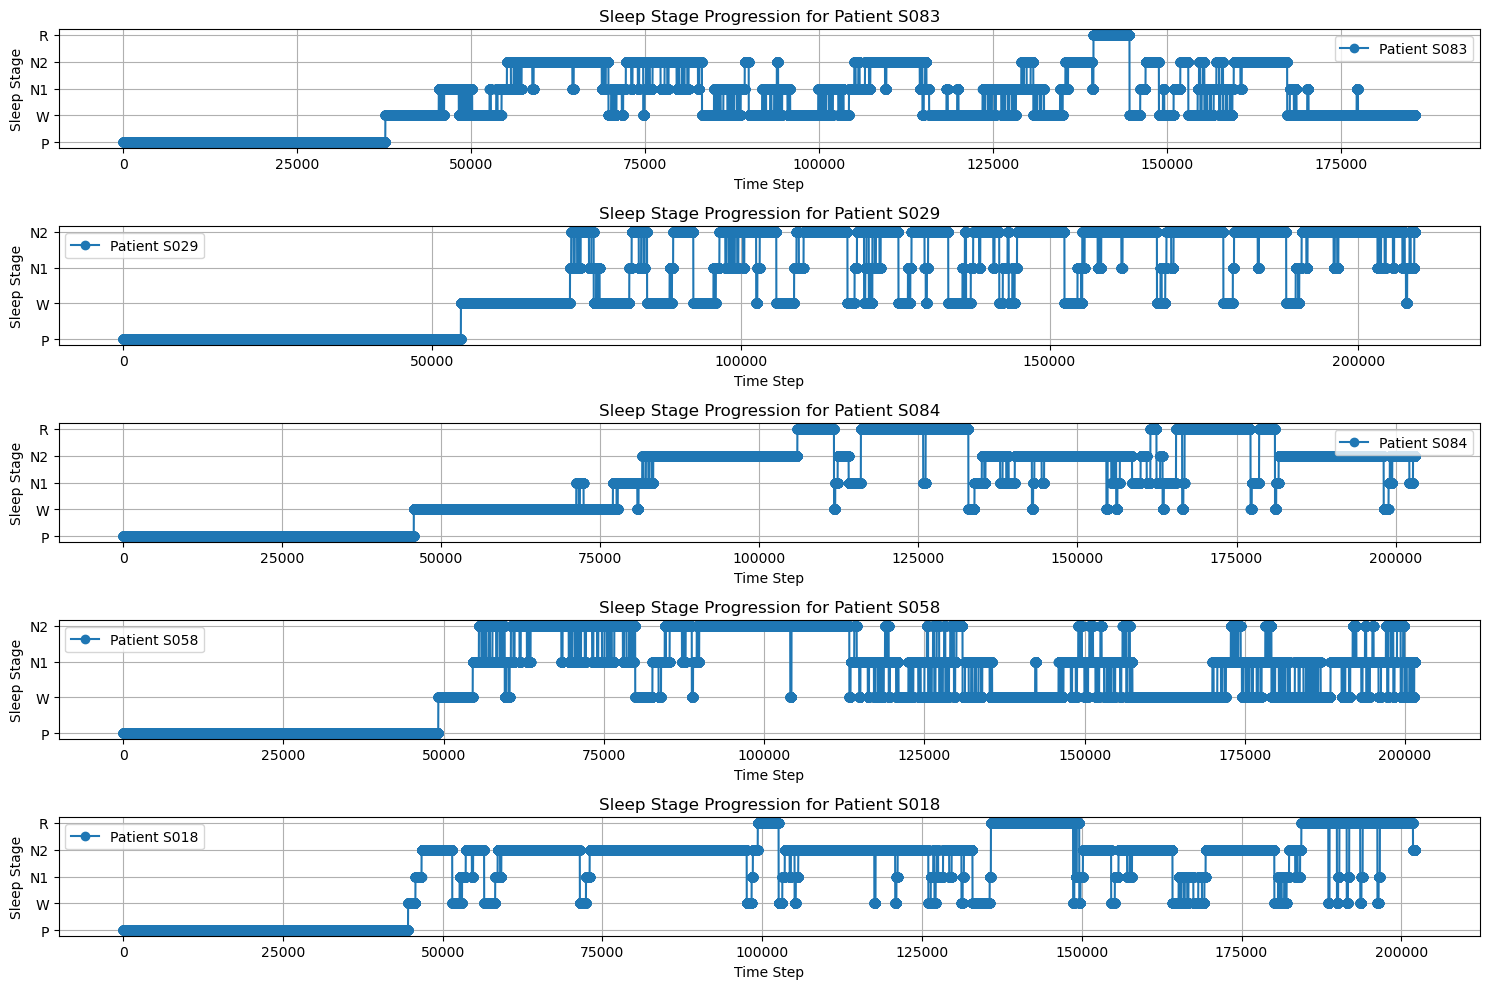

In [33]:
# Örnek 5 hasta seçimi
selected_patients = ['S083', 'S029', 'S084', 'S058', 'S018']

# Tüm seçilen hastaların sleep stage zaman serisini çizme
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for idx, patient_id in enumerate(selected_patients, 1):
    sleep_stages = train_set2[patient_id]['Sleep_Stage']
    plt.subplot(len(selected_patients), 1, idx)
    plt.plot(range(len(sleep_stages)), sleep_stages, marker='o', linestyle='-', label=f"Patient {patient_id}")
    plt.title(f"Sleep Stage Progression for Patient {patient_id}")
    plt.xlabel("Time Step")
    plt.ylabel("Sleep Stage")
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()

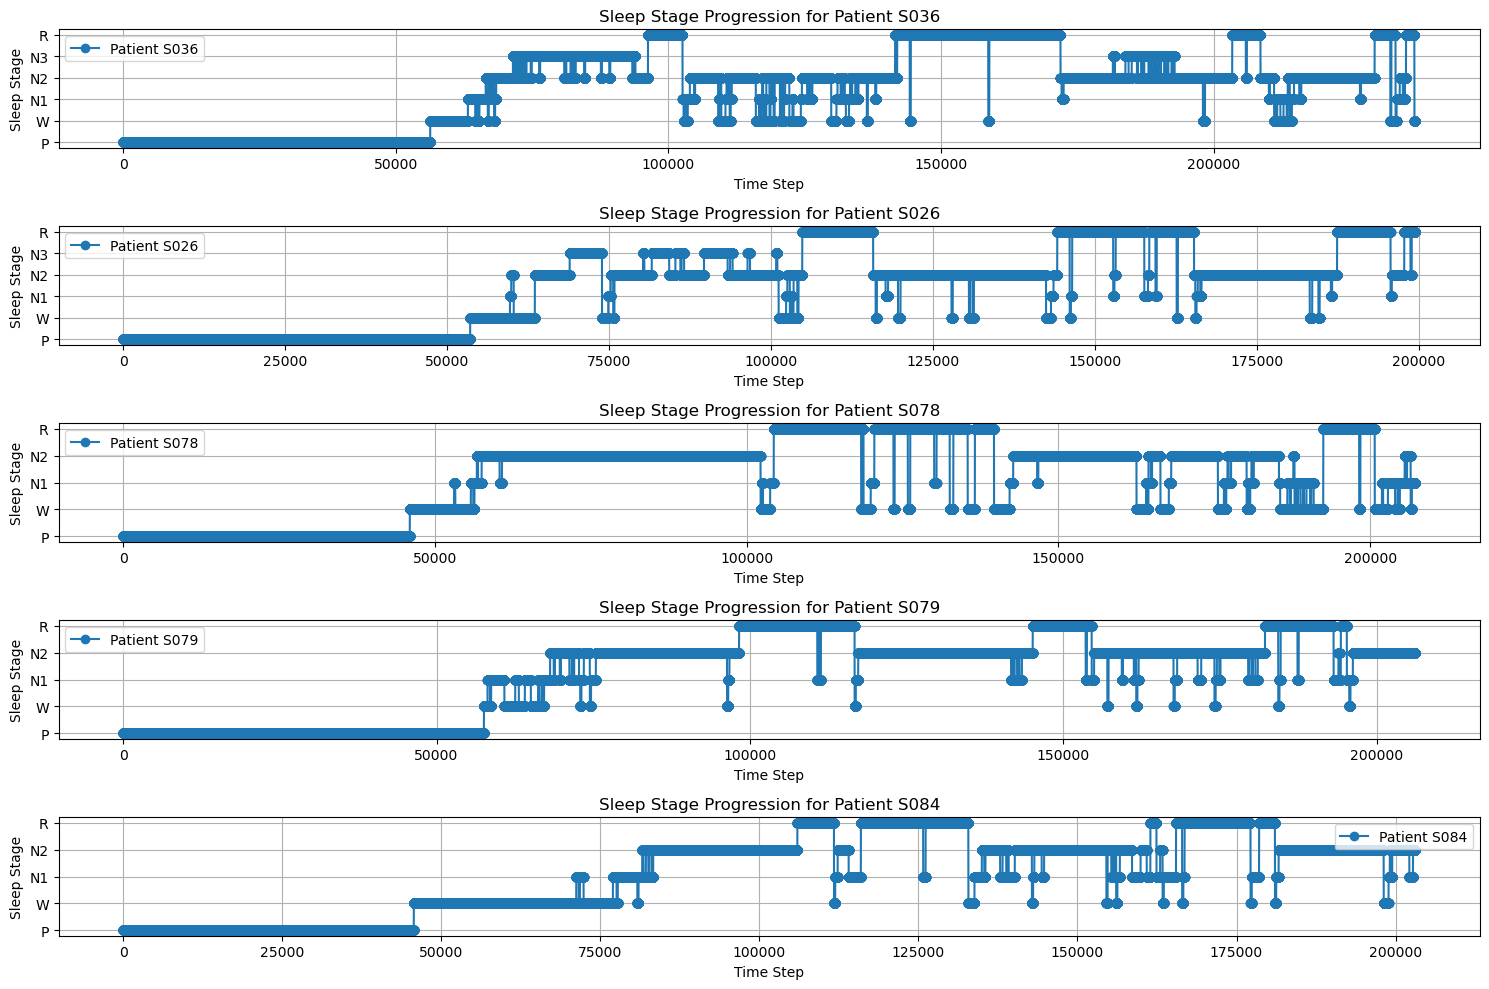

In [ ]:
#R değeri en fazla olan 5 hasta:
# Örnek 5 hasta seçimi
selected_patients = ['S036', 'S026', 'S078', 'S079', 'S084']

# Tüm seçilen hastaların sleep stage zaman serisini çizme
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for idx, patient_id in enumerate(selected_patients, 1):
    sleep_stages = train_set2[patient_id]['Sleep_Stage']
    plt.subplot(len(selected_patients), 1, idx)
    plt.plot(range(len(sleep_stages)), sleep_stages, marker='o', linestyle='-', label=f"Patient {patient_id}")
    plt.title(f"Sleep Stage Progression for Patient {patient_id}")
    plt.xlabel("Time Step")
    plt.ylabel("Sleep Stage")
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()

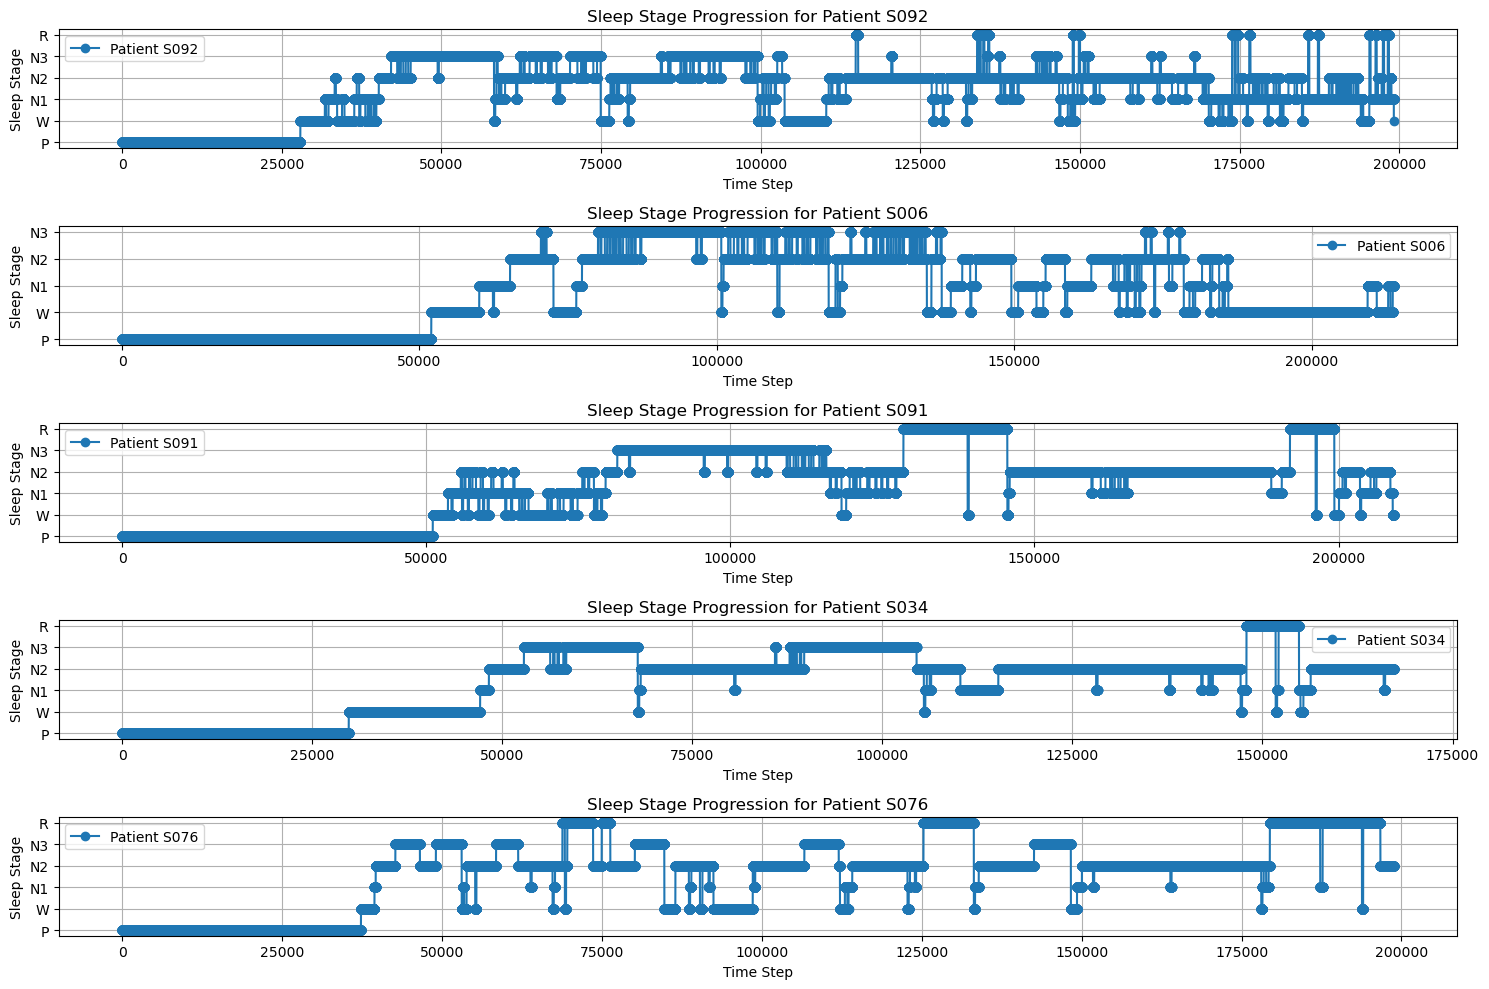

In [37]:
#N3 değeri en fazla olan 5 hasta:
# Örnek 5 hasta seçimi
selected_patients = ['S092', 'S006', 'S091', 'S034', 'S076']

# Tüm seçilen hastaların sleep stage zaman serisini çizme
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for idx, patient_id in enumerate(selected_patients, 1):
    sleep_stages = train_set2[patient_id]['Sleep_Stage']
    plt.subplot(len(selected_patients), 1, idx)
    plt.plot(range(len(sleep_stages)), sleep_stages, marker='o', linestyle='-', label=f"Patient {patient_id}")
    plt.title(f"Sleep Stage Progression for Patient {patient_id}")
    plt.xlabel("Time Step")
    plt.ylabel("Sleep Stage")
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()

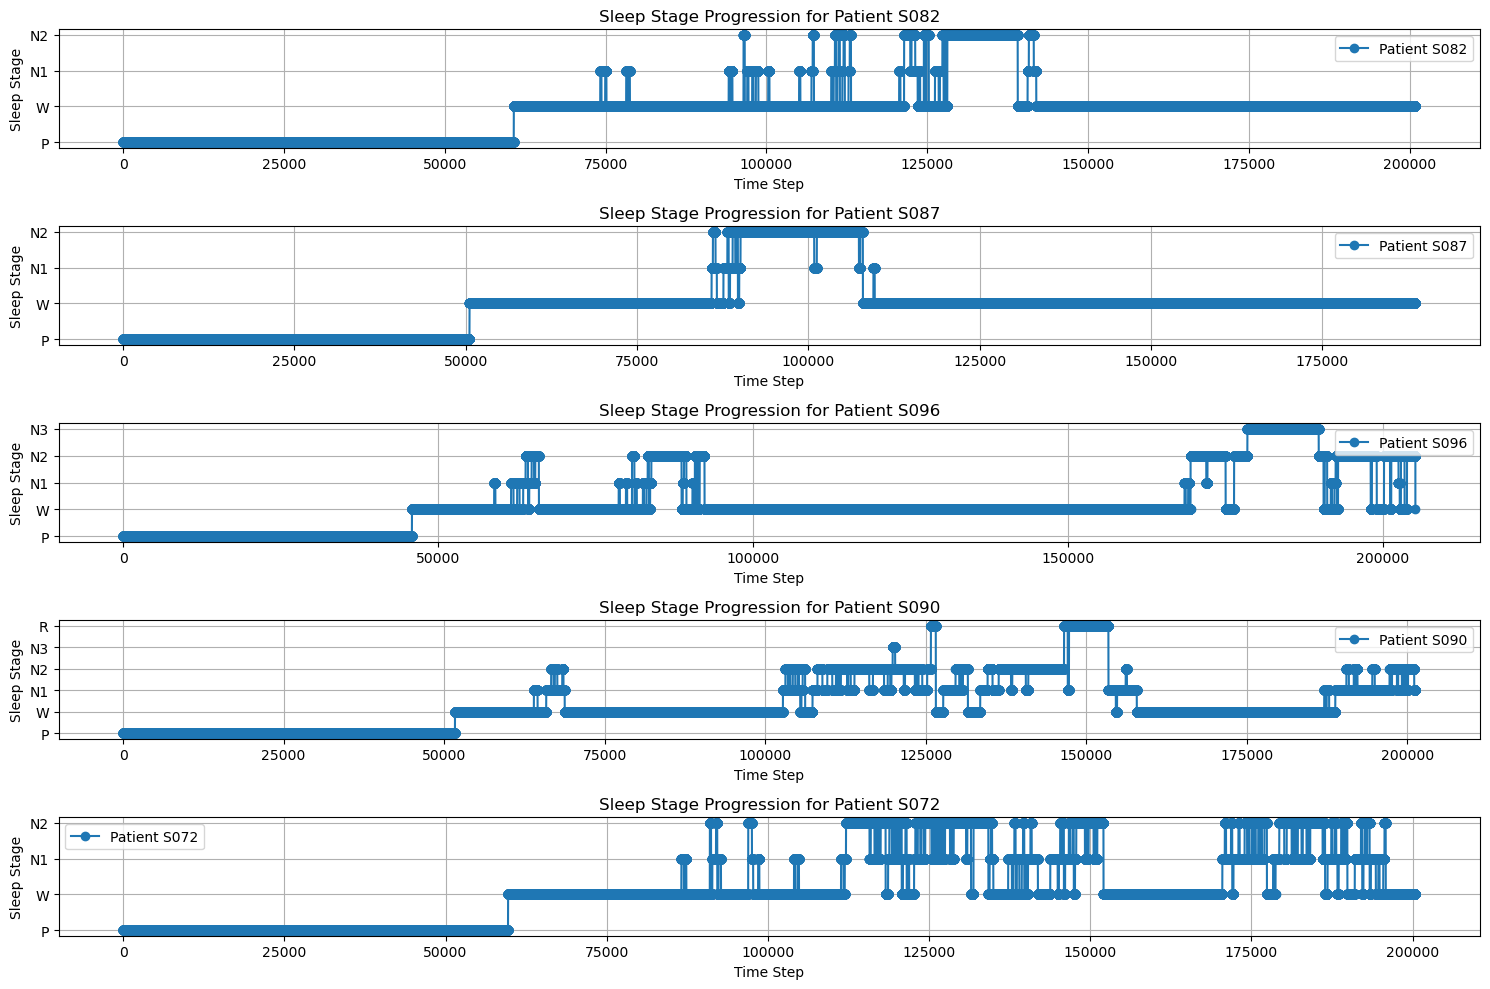

In [38]:
#N2 değeri en az olan 5 hasta:
# Örnek 5 hasta seçimi
selected_patients = ['S082', 'S087', 'S096', 'S090', 'S072']

# Tüm seçilen hastaların sleep stage zaman serisini çizme
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for idx, patient_id in enumerate(selected_patients, 1):
    sleep_stages = train_set2[patient_id]['Sleep_Stage']
    plt.subplot(len(selected_patients), 1, idx)
    plt.plot(range(len(sleep_stages)), sleep_stages, marker='o', linestyle='-', label=f"Patient {patient_id}")
    plt.title(f"Sleep Stage Progression for Patient {patient_id}")
    plt.xlabel("Time Step")
    plt.ylabel("Sleep Stage")
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

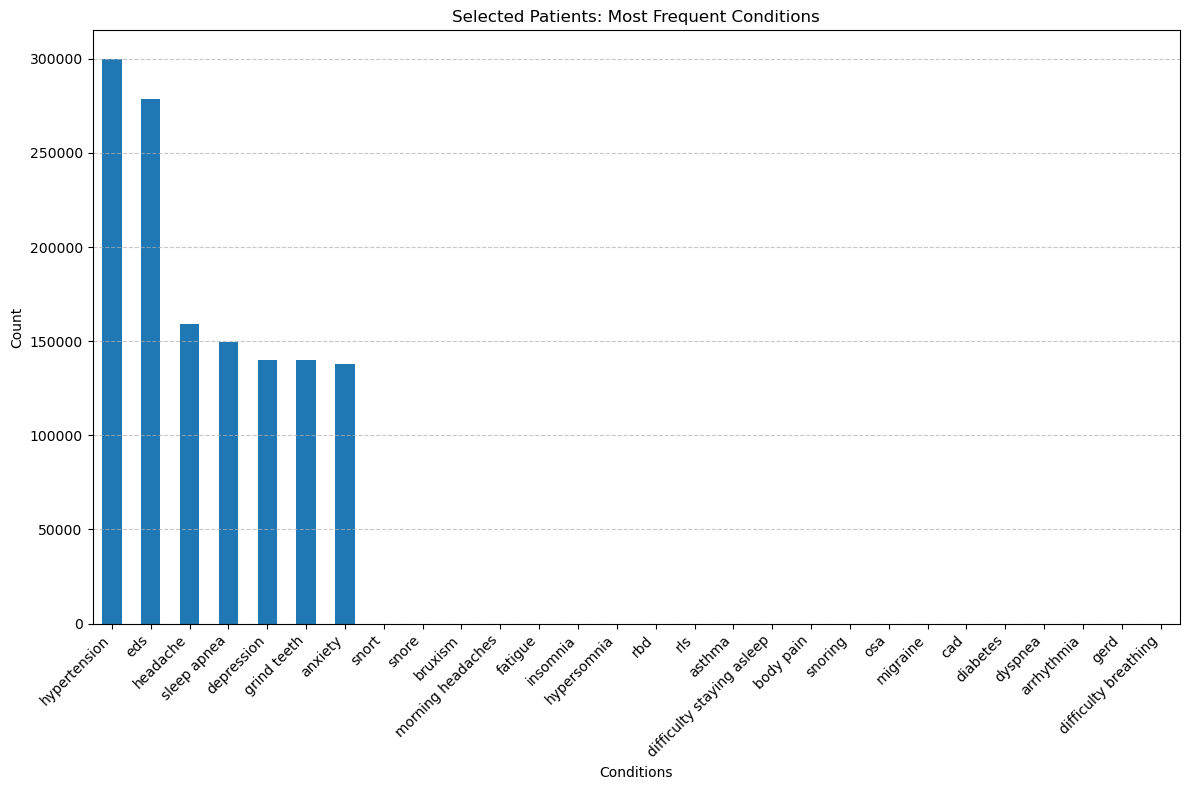

In [40]:
# İlgili hastalar
selected_patients = ['S082', 'S087', 'S096', 'S090', 'S072']

# İlgili sütunlar
columns_of_interest = [
    'asthma', 'body pain', 'gerd', 'hypertension', 'sleep apnea', 'arrhythmia',
    'depression', 'dyspnea', 'diabetes', 'cad', 'anxiety', 'migraine',
    'osa', 'snoring', 'difficulty breathing', 'difficulty staying asleep',
    'snort', 'rls', 'eds', 'rbd', 'hypersomnia', 'grind teeth', 'insomnia',
    'fatigue', 'morning headaches', 'bruxism', 'snore', 'headache'
]

# İlgili sütunların toplamını hesaplamak
condition_counts = {col: 0 for col in columns_of_interest}
for patient_id in selected_patients:
    for col in columns_of_interest:
        condition_counts[col] += train_set1[patient_id][col].sum()

# Veriyi sıralı hale getirme
condition_df = pd.DataFrame.from_dict(condition_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# Görselleştirme
plt.figure(figsize=(12, 8))
condition_df.plot(kind='bar', legend=False, figsize=(12, 8))
plt.title("Selected Patients: Most Frequent Conditions")
plt.xlabel("Conditions")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

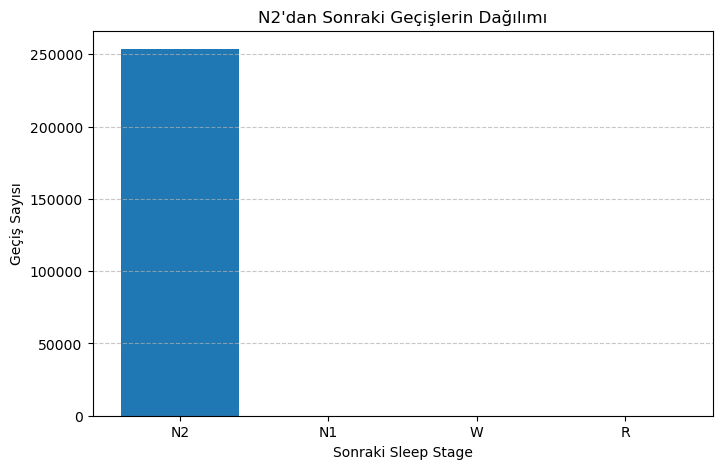

In [32]:
# N2 sonrası geçişlerin analizi
n2_transitions = Counter()
for patient_id in ['S083', 'S029', 'S084', 'S058']:  # Diğer hastaları da ekleyin
    sleep_stages = train_set2[patient_id]['Sleep_Stage'].tolist()
    for i in range(len(sleep_stages) - 1):
        if sleep_stages[i] == 'N2':
            n2_transitions[sleep_stages[i + 1]] += 1

# N2 sonrası geçişlerin görselleştirilmesi
plt.figure(figsize=(8, 5))
plt.bar(n2_transitions.keys(), n2_transitions.values())
plt.title("N2'dan Sonraki Geçişlerin Dağılımı")
plt.xlabel("Sonraki Sleep Stage")
plt.ylabel("Geçiş Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from tqdm import tqdm


# Sınıf ağırlıklarını manuel olarak hesaplama
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

In [15]:
class_weight_dict

{'N1': 1.6302827731199965,
 'N2': 0.39895852509024987,
 'N3': 14.201087602680502,
 'R': 1.9215511599422315,
 'W': 0.7756428099154038}

In [41]:
from tqdm import tqdm

# Model tanımı (warm_start=True ile)
rf_classifier3 = RandomForestClassifier(
    n_estimators=1,  # Başlangıçta 1 ağaç
    criterion='gini',
    max_depth=48,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    class_weight=class_weight_dict,  # Hesaplanan sınıf ağırlıkları
    n_jobs=-1,
    warm_start=True,  # Ağaçları aşamalı olarak eğitmek için
    random_state=42
)

# Toplam ağaç sayısı
total_estimators = 100

# İlerleme çubuğu ile eğitim
with tqdm(total=total_estimators, desc="Training Progress") as pbar:
    for i in range(1, total_estimators + 1):
        rf_classifier3.set_params(n_estimators=i)  # Ağaç sayısını artır
        rf_classifier3.fit(X_train3, y_train3)  # Eğit
        pbar.update(1)


# Test setinde değerlendirme
y_pred3 = rf_classifier3.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)

# Performans ölçütleri
print(f"Test Accuracy: {accuracy3:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test3, y_pred3))
print("Classification Report:")
print(classification_report(y_test3, y_pred3))


Training Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Training Progress: 100%|██████████| 100/100 [1:28:59<00:00, 53.40s/it]


Test Accuracy: 0.4430
Confusion Matrix:
[[   5689   71218       4   31214     197  391840]
 [  29917  295890     172   49696     482 1824362]
 [    120    8463       0    2993    1017  182479]
 [      2      70       0 1392793       0   53573]
 [  15428   56649       0       0    4132  354064]
 [  14191  134185    1484  149291     801  985112]]
Classification Report:
              precision    recall  f1-score   support

          N1       0.09      0.01      0.02    500162
          N2       0.52      0.13      0.21   2200519
          N3       0.00      0.00      0.00    195072
           P       0.86      0.96      0.91   1446438
           R       0.62      0.01      0.02    430273
           W       0.26      0.77      0.39   1285064

    accuracy                           0.44   6057528
   macro avg       0.39      0.31      0.26   6057528
weighted avg       0.50      0.44      0.38   6057528



In [13]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder ile sınıf etiketlerini dönüştür
label_encoder = LabelEncoder()

# Eğitim ve test setlerindeki sınıf etiketlerini dönüştür
y_train_encoded = label_encoder.fit_transform(y_train6)
y_test_encoded = label_encoder.transform(y_test6)

# Dönüşüm sonucu eşleştirme tablosunu yazdır (isteğe bağlı)
print("Class Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Class Mapping: {'N1': 0, 'N2': 1, 'N3': 2, 'P': 3, 'R': 4, 'W': 5}


In [46]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# XGBoost modeli tanımı
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,      # Ağaç sayısı
    max_depth=48,          # Maksimum derinlik
    learning_rate=0.1,     # Öğrenme oranı
    min_child_weight=5,    # Yaprak düğümündeki minimum ağırlık
    colsample_bytree=0.8,  # Ağaç başına sütun alt örnekleme oranı
    subsample=0.8,         # Alt örnekleme oranı
    objective='multi:softmax',  # Çok sınıflı sınıflandırma
    num_class=len(label_encoder.classes_),  # Sınıf sayısı
    random_state=42,
    n_jobs=-1
)

# Modeli eğitme ve her iterasyonu izleme
xgb_classifier.fit(
    X_train3,
    y_train_encoded,
    eval_set=[(X_train3, y_train_encoded), (X_test3, y_test_encoded)],  # Değerlendirme setleri
    verbose=True  # Her iterasyonda sonuçları yazdır
)

# Test setinde değerlendirme
y_pred_xgb = xgb_classifier.predict(X_test3)

# Sınıf etiketlerini geri dönüştürme
y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)

# Performans ölçütleri
accuracy_xgb = accuracy_score(y_test3, y_pred_labels)
print(f"Test Accuracy (XGBoost): {accuracy_xgb:.4f}")
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test3, y_pred_labels))
print("Classification Report (XGBoost):")
print(classification_report(y_test3, y_pred_labels))


[0]	validation_0-mlogloss:1.51237	validation_1-mlogloss:1.69615
[1]	validation_0-mlogloss:1.30440	validation_1-mlogloss:1.63426
[2]	validation_0-mlogloss:1.14027	validation_1-mlogloss:1.58295
[3]	validation_0-mlogloss:1.00585	validation_1-mlogloss:1.55732
[4]	validation_0-mlogloss:0.89234	validation_1-mlogloss:1.52331
[5]	validation_0-mlogloss:0.79562	validation_1-mlogloss:1.50763
[6]	validation_0-mlogloss:0.71129	validation_1-mlogloss:1.48034
[7]	validation_0-mlogloss:0.63728	validation_1-mlogloss:1.45976
[8]	validation_0-mlogloss:0.57193	validation_1-mlogloss:1.43930
[9]	validation_0-mlogloss:0.51446	validation_1-mlogloss:1.42317
[10]	validation_0-mlogloss:0.46347	validation_1-mlogloss:1.40857
[11]	validation_0-mlogloss:0.41846	validation_1-mlogloss:1.39820
[12]	validation_0-mlogloss:0.37806	validation_1-mlogloss:1.38680
[13]	validation_0-mlogloss:0.34202	validation_1-mlogloss:1.38440
[14]	validation_0-mlogloss:0.30949	validation_1-mlogloss:1.37453
[15]	validation_0-mlogloss:0.28040	

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import multiprocessing

# Multiprocessing bağlamını spawn olarak ayarla
multiprocessing.set_start_method("spawn", force=True)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_test_scaled = scaler.transform(X_test3)

# Logistic Regression modeli
logreg_classifier = LogisticRegression(
    solver='lbfgs',
    penalty='l2',  # Varsayılan düzenleme
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

# Modeli eğitme
logreg_classifier.fit(X_train_scaled, y_train_encoded)

# Test setinde değerlendirme
y_pred_logreg = logreg_classifier.predict(X_test_scaled)

# Performans ölçütleri
accuracy_logreg = accuracy_score(y_test_encoded, y_pred_logreg)
print(f"Test Accuracy (Logistic Regression): {accuracy_logreg:.4f}")
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test_encoded, y_pred_logreg))
print("Classification Report (Logistic Regression):")
print(classification_report(y_test_encoded, y_pred_logreg))
#Class Mapping: {'N1': 0, 'N2': 1, 'N3': 2, 'P': 3, 'R': 4, 'W': 5}

Test Accuracy (Logistic Regression): 0.5942
Confusion Matrix (Logistic Regression):
[[   1241  444030       0   38781    6976   45613]
 [   4892 2124815       0   61613   31119  121116]
 [   6074  164716       0   14946       0   24312]
 [      0   46012       0 1352052       0    6609]
 [    192  406420       0       0   16830   57903]
 [   2538  823305       0  144481    7643  106263]]
Classification Report (Logistic Regression):


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.08      0.00      0.00    536641
           1       0.53      0.91      0.67   2343555
           2       0.00      0.00      0.00    210048
           3       0.84      0.96      0.90   1404673
           4       0.27      0.03      0.06    481345
           5       0.29      0.10      0.15   1084230

    accuracy                           0.59   6060492
   macro avg       0.34      0.33      0.30   6060492
weighted avg       0.48      0.59      0.50   6060492



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import multiprocessing

# Multiprocessing bağlamını spawn olarak ayarla
multiprocessing.set_start_method("spawn", force=True)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_test_scaled = scaler.transform(X_test3)

# Logistic Regression modeli
logreg_classifier = LogisticRegression(
    solver='lbfgs',
    penalty='l2',  # Varsayılan düzenleme
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

# Modeli eğitme
logreg_classifier.fit(X_train_scaled, y_train_encoded)

# Test setinde değerlendirme
y_pred_logreg = logreg_classifier.predict(X_test_scaled)

# Performans ölçütleri
accuracy_logreg = accuracy_score(y_test_encoded, y_pred_logreg)
print(f"Test Accuracy (Logistic Regression): {accuracy_logreg:.4f}")
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test_encoded, y_pred_logreg))
print("Classification Report (Logistic Regression):")
print(classification_report(y_test_encoded, y_pred_logreg))
#Class Mapping: {'N1': 0, 'N2': 1, 'N3': 2, 'P': 3, 'R': 4, 'W': 5}

Test Accuracy (Logistic Regression): 0.6052
Confusion Matrix (Logistic Regression):
[[      0  560408       0   10334    3987   36794]
 [      0 2161925       0   18110    2211   56863]
 [      0  157298       0     213       0     697]
 [      0   99607       2 1410811       0   18081]
 [      0  384436       0       0    1620   29243]
 [      0  924233       0   87743   13267  110634]]
Classification Report (Logistic Regression):


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    611523
           1       0.50      0.97      0.66   2239109
           2       0.00      0.00      0.00    158208
           3       0.92      0.92      0.92   1528501
           4       0.08      0.00      0.01    415299
           5       0.44      0.10      0.16   1135877

    accuracy                           0.61   6088517
   macro avg       0.32      0.33      0.29   6088517
weighted avg       0.50      0.61      0.51   6088517



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


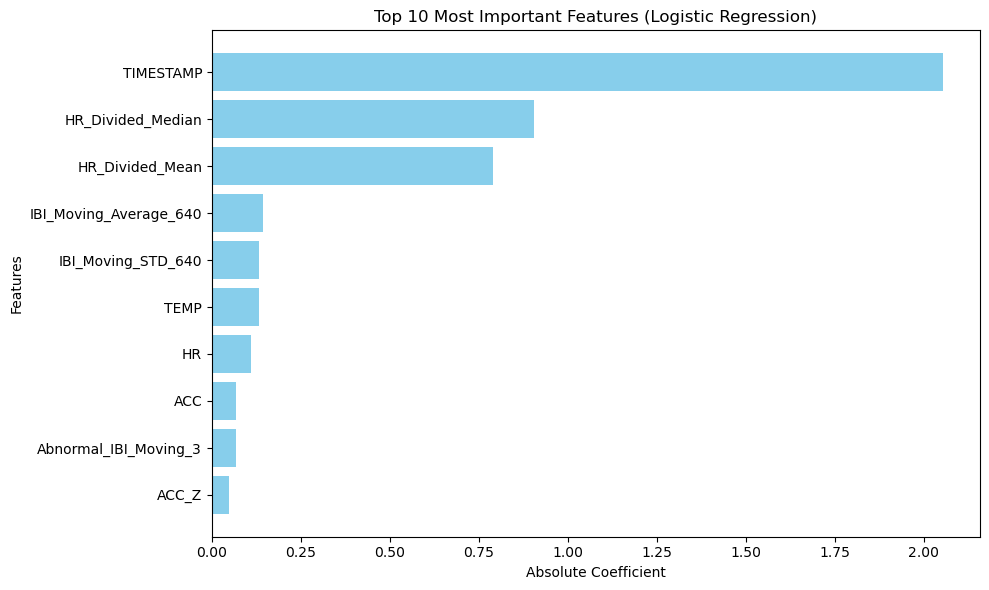

Top 10 Most Important Features:
                   Feature  Coefficient  Absolute Coefficient
0                TIMESTAMP     2.054575              2.054575
13       HR_Divided_Median    -0.904634              0.904634
12         HR_Divided_Mean     0.789226              0.789226
9   IBI_Moving_Average_640     0.144525              0.144525
10      IBI_Moving_STD_640     0.133334              0.133334
5                     TEMP     0.132617              0.132617
7                       HR     0.110373              0.110373
11                     ACC    -0.068198              0.068198
15   Abnormal_IBI_Moving_3     0.067141              0.067141
4                    ACC_Z    -0.047042              0.047042


In [58]:
# Özellik adlarını ve katsayılarını alma
feature_names = X_train3.columns if hasattr(X_train3, 'columns') else [f"Feature {i}" for i in range(X_train3.shape[1])]
coefficients = logreg_classifier.coef_[0]  # Çok sınıflıysa her sınıf için katsayılar bulunur

# Katsayıları ve özellik adlarını birleştirme
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Katsayıların büyüklüklerine göre sıralama
feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance_sorted = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Özellik önemlerini görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_sorted['Feature'][:10], feature_importance_sorted['Absolute Coefficient'][:10], color='skyblue')
plt.title("Top 10 Most Important Features (Logistic Regression)")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # En önemli özellik en üstte olsun
plt.tight_layout()
plt.show()

# Özellik önemlerini yazdırma
print("Top 10 Most Important Features:")
print(feature_importance_sorted.head(10))

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import multiprocessing

# Multiprocessing bağlamını spawn olarak ayarla
multiprocessing.set_start_method("spawn", force=True)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train6)
X_test_scaled = scaler.transform(X_test6)

# Logistic Regression modeli
logreg_classifier = LogisticRegression(
    solver='lbfgs',
    penalty='l2',  # Varsayılan düzenleme
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

# Modeli eğitme
logreg_classifier.fit(X_train_scaled, y_train_encoded)

# Test setinde değerlendirme
y_pred_logreg = logreg_classifier.predict(X_test_scaled)

# Performans ölçütleri
accuracy_logreg = accuracy_score(y_test_encoded, y_pred_logreg)
print(f"Test Accuracy (Logistic Regression): {accuracy_logreg:.4f}")
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test_encoded, y_pred_logreg))
print("Classification Report (Logistic Regression):")
print(classification_report(y_test_encoded, y_pred_logreg))
#Class Mapping: {'N1': 0, 'N2': 1, 'N3': 2, 'P': 3, 'R': 4, 'W': 5}

Test Accuracy (Logistic Regression): 0.5775
Confusion Matrix (Logistic Regression):
[[      0  368615   15767   25979    2324   53301]
 [      0 1949978  110602   51756   21177  155135]
 [      0  109870   16438     774      47   17831]
 [      0   49869    2228 1348474       0   38034]
 [      0  395414    8434       0    2688   36793]
 [    120  897619   39328  148732    5742  175666]]
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    465986
           1       0.52      0.85      0.64   2288648
           2       0.09      0.11      0.10    144960
           3       0.86      0.94      0.89   1438605
           4       0.08      0.01      0.01    443329
           5       0.37      0.14      0.20   1267207

    accuracy                           0.58   6048735
   macro avg       0.32      0.34      0.31   6048735
weighted avg       0.48      0.58      0.50   6048735



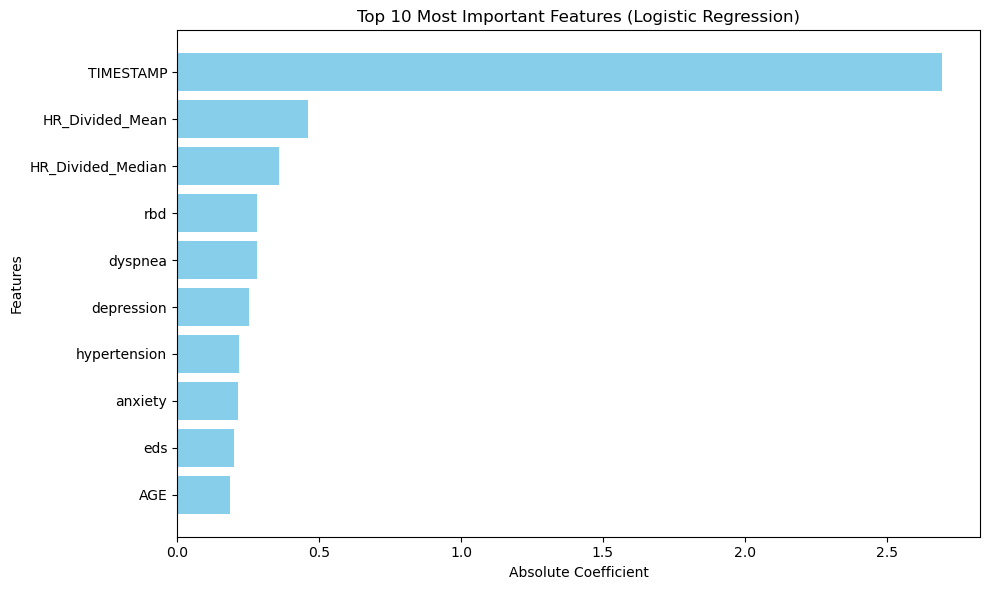

Top 10 Most Important Features:
              Feature  Coefficient  Absolute Coefficient
0           TIMESTAMP     2.692987              2.692987
12    HR_Divided_Mean     0.461694              0.461694
13  HR_Divided_Median    -0.359212              0.359212
39                rbd     0.281611              0.281611
27            dyspnea     0.280472              0.280472
26         depression     0.251989              0.251989
23       hypertension     0.217752              0.217752
30            anxiety     0.215252              0.215252
38                eds    -0.201381              0.201381
17                AGE     0.187183              0.187183


In [64]:
# Özellik adlarını ve katsayılarını alma
feature_names = X_train6.columns if hasattr(X_train6, 'columns') else [f"Feature {i}" for i in range(X_train6.shape[1])]
coefficients = logreg_classifier.coef_[0]  # Çok sınıflıysa her sınıf için katsayılar bulunur

# Katsayıları ve özellik adlarını birleştirme
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Katsayıların büyüklüklerine göre sıralama
feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance_sorted = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Özellik önemlerini görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_sorted['Feature'][:10], feature_importance_sorted['Absolute Coefficient'][:10], color='skyblue')
plt.title("Top 10 Most Important Features (Logistic Regression)")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # En önemli özellik en üstte olsun
plt.tight_layout()
plt.show()

# Özellik önemlerini yazdırma
print("Top 10 Most Important Features:")
print(feature_importance_sorted.head(10))

In [ ]:
# Özellik adlarını ve katsayılarını alma
feature_names = X_train6.columns if hasattr(X_train6, 'columns') else [f"Feature {i}" for i in range(X_train6.shape[1])]
coefficients = logreg_classifier.coef_[0]  # Çok sınıflıysa her sınıf için katsayılar bulunur

# Katsayıları ve özellik adlarını birleştirme
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Katsayıların büyüklüklerine göre sıralama
feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance_sorted = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Özellik önemlerini görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_sorted['Feature'][:10], feature_importance_sorted['Absolute Coefficient'][:10], color='skyblue')
plt.title("Top 10 Most Important Features (Logistic Regression)")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # En önemli özellik en üstte olsun
plt.tight_layout()
plt.show()

# Özellik önemlerini yazdırma
print("Top 10 Most Important Features:")
print(feature_importance_sorted.head(10))

Top 10 Least Important Features:
                      Feature  Coefficient  Absolute Coefficient
29                        cad     0.000000              0.000000
40                hypersomnia     0.000000              0.000000
42                   insomnia     0.000000              0.000000
46                      snore     0.000000              0.000000
35  difficulty staying asleep     0.000000              0.000000
1                         BVP     0.000121              0.000121
31                   migraine    -0.001882              0.001882
44          morning headaches     0.010328              0.010328
47                   headache     0.010328              0.010328
6                         EDA    -0.010743              0.010743


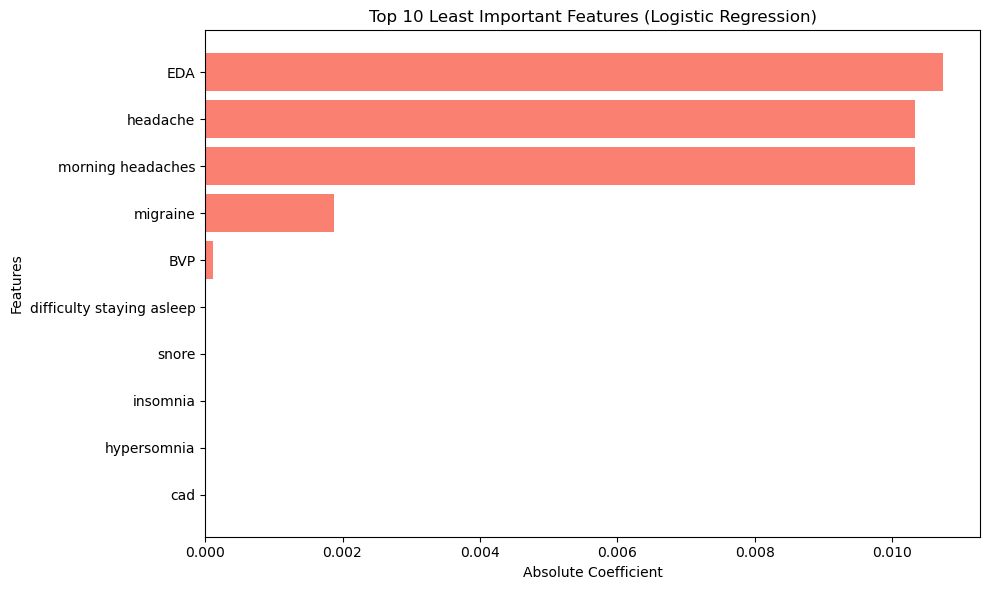

In [65]:
# En az kullanılan özellikler (katsayıya göre sıralama)
least_important_features = feature_importance.sort_values(by='Absolute Coefficient', ascending=True)

# Özellik önemlerini yazdırma
print("Top 10 Least Important Features:")
print(least_important_features.head(10))

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(least_important_features['Feature'][:10], least_important_features['Absolute Coefficient'][:10], color='salmon')
plt.title("Top 10 Least Important Features (Logistic Regression)")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import multiprocessing

# Multiprocessing bağlamını spawn olarak ayarla
multiprocessing.set_start_method("spawn", force=True)

# Çıkarılacak sütunların listesi
columns_to_remove = [ 'cad', 'rbd', 'hypersomnia', 
                     'insomnia', 'fatigue', 'morning headaches', 'bruxism', 
                     'snore', 'headache']


# dtrain ve dtest için sütunları çıkart
X_train_filtered = X_train6.drop(columns=columns_to_remove)
X_test_filtered = X_test6.drop(columns=columns_to_remove)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train_filtered)
X_test_scaled2 = scaler.transform(X_test_filtered)

# Logistic Regression modeli
logreg_classifier2 = LogisticRegression(
    solver='lbfgs',
    penalty='l2',  # Varsayılan düzenleme
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)
print("train started")
# Modeli eğitme
logreg_classifier2.fit(X_train_scaled2, y_train_encoded)

# Test setinde değerlendirme
y_pred_logreg2 = logreg_classifier2.predict(X_test_scaled2)

# Performans ölçütleri
accuracy_logreg = accuracy_score(y_test_encoded, y_pred_logreg2)
print(f"Test Accuracy (Logistic Regression): {accuracy_logreg:.4f}")
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test_encoded, y_pred_logreg2))
print("Classification Report (Logistic Regression):")
print(classification_report(y_test_encoded, y_pred_logreg2))
#Class Mapping: {'N1': 0, 'N2': 1, 'N3': 2, 'P': 3, 'R': 4, 'W': 5}

train started


/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: Using fork() can cause Polars to deadlock in the child process.
In addition, using fork() with Python in general is a recipe for mysterious
deadlocks and crashes.

The most likely reason you are seeing this error is because you are using the
multiprocessing module on Linux, which uses fork() by default. This will be
fixed in Python 3.14. Until then, you want to use the "spawn" context instead.

See https://docs.pola.rs/user-guide/misc/multiprocessing/ for details.

If you really know what your doing, you can silence this warning with the warning module
or by setting POLARS_ALLOW_FORKING_THREAD=1.

  pid = os.fork()


Test Accuracy (Logistic Regression): 0.5751
Confusion Matrix (Logistic Regression):
[[   6217  414545    7125   26552    6179   55674]
 [   6317 1914453   15095   36206   11004  258719]
 [      0  124715    6720   14664       0    7885]
 [      0   33164     974 1364015       0   34948]
 [  11630  384104     384       0    2522   30867]
 [   9522  868915    4835  185715   19120  183710]]
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.18      0.01      0.02    516292
           1       0.51      0.85      0.64   2241794
           2       0.19      0.04      0.07    153984
           3       0.84      0.95      0.89   1433101
           4       0.06      0.01      0.01    429507
           5       0.32      0.14      0.20   1271817

    accuracy                           0.58   6046495
   macro avg       0.35      0.34      0.31   6046495
weighted avg       0.48      0.58      0.50   6046495



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import multiprocessing

# Multiprocessing bağlamını spawn olarak ayarla
multiprocessing.set_start_method("spawn", force=True)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_test_scaled = scaler.transform(X_test3)

# Logistic Regression modeli
logreg_classifier = LogisticRegression(
    solver='lbfgs',
    penalty='l2',  # Varsayılan düzenleme
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

# Modeli eğitme
logreg_classifier.fit(X_train_scaled, y_train_encoded)

# Test setinde değerlendirme
y_pred_logreg = logreg_classifier.predict(X_test_scaled)

# Performans ölçütleri
accuracy_logreg = accuracy_score(y_test_encoded, y_pred_logreg)
print(f"Test Accuracy (Logistic Regression): {accuracy_logreg:.4f}")
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test_encoded, y_pred_logreg))
print("Classification Report (Logistic Regression):")
print(classification_report(y_test_encoded, y_pred_logreg))
#Class Mapping: {'N1': 0, 'N2': 1, 'N3': 2, 'P': 3, 'R': 4, 'W': 5}

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: Using fork() can cause Polars to deadlock in the child process.
In addition, using fork() with Python in general is a recipe for mysterious
deadlocks and crashes.

The most likely reason you are seeing this error is because you are using the
multiprocessing module on Linux, which uses fork() by default. This will be
fixed in Python 3.14. Until then, you want to use the "spawn" context instead.

See https://docs.pola.rs/user-guide/misc/multiprocessing/ for details.

If you really know what your doing, you can silence this warning with the warning module
or by setting POLARS_ALLOW_FORKING_THREAD=1.

  pid = os.fork()


Test Accuracy (Logistic Regression): 0.6221
Confusion Matrix (Logistic Regression):
[[     37  404027       0   33722    3195   23852]
 [    376 2256352       0   69257   15248   93524]
 [   1051  180827       0   15562       0   13376]
 [      0   36395       0 1377175       0   11512]
 [     24  480099       0       0   13239   26771]
 [    588  739164       1  139777   11844  139288]]
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.02      0.00      0.00    464833
           1       0.55      0.93      0.69   2434757
           2       0.00      0.00      0.00    210816
           3       0.84      0.97      0.90   1425082
           4       0.30      0.03      0.05    520133
           5       0.45      0.14      0.21   1030662

    accuracy                           0.62   6086283
   macro avg       0.36      0.34      0.31   6086283
weighted avg       0.52      0.62      0.53   6086283



In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import multiprocessing

# Multiprocessing bağlamını spawn olarak ayarla
multiprocessing.set_start_method("spawn", force=True)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train4)
X_test_scaled = scaler.transform(X_test4)

# SGDClassifier modeli
sgd_classifier = SGDClassifier(
    loss='log_loss',  # Logistic Regression için log-loss
    penalty='l2',  # L2 düzenleme
    max_iter=50,  # 50 iterasyon
    random_state=42
)

# Modeli eğitme
sgd_classifier.fit(X_train_scaled, y_train_encoded)

# Test setinde değerlendirme
y_pred_sgd = sgd_classifier.predict(X_test_scaled)

# Performans ölçütleri
accuracy_sgd = accuracy_score(y_test_encoded, y_pred_sgd)
print(f"Test Accuracy (SGD Classifier): {accuracy_sgd:.4f}")
print("Confusion Matrix (SGD Classifier):")
print(confusion_matrix(y_test_encoded, y_pred_sgd))
print("Classification Report (SGD Classifier):")
print(classification_report(y_test_encoded, y_pred_sgd))

Test Accuracy (SGD Classifier): 0.4649
Confusion Matrix (SGD Classifier):
[[      0  351440   14063   36784  111125]
 [      0 1658637   32023  174493  530056]
 [      0  148870   26308     239   10439]
 [      0  318355       0   68091  100659]
 [      0  554512   25931   66318  397724]]
Classification Report (SGD Classifier):


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    513412
           1       0.55      0.69      0.61   2395209
           2       0.27      0.14      0.19    185856
           3       0.20      0.14      0.16    487105
           4       0.35      0.38      0.36   1044485

    accuracy                           0.46   4626067
   macro avg       0.27      0.27      0.26   4626067
weighted avg       0.39      0.46      0.42   4626067



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import multiprocessing

# Multiprocessing bağlamını spawn olarak ayarla
multiprocessing.set_start_method("spawn", force=True)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train4)
X_test_scaled = scaler.transform(X_test4)

# SGDClassifier modeli
sgd_classifier = SGDClassifier(
    loss='log_loss',  # Logistic Regression için log-loss
    penalty='l2',  # L2 düzenleme
    max_iter=200,  # 50 iterasyon
    random_state=42
)

# Modeli eğitme
sgd_classifier.fit(X_train_scaled, y_train_encoded)

# Test setinde değerlendirme
y_pred_sgd = sgd_classifier.predict(X_test_scaled)

# Performans ölçütleri
accuracy_sgd = accuracy_score(y_test_encoded, y_pred_sgd)
print(f"Test Accuracy (SGD Classifier): {accuracy_sgd:.4f}")
print("Confusion Matrix (SGD Classifier):")
print(confusion_matrix(y_test_encoded, y_pred_sgd))
print("Classification Report (SGD Classifier):")
print(classification_report(y_test_encoded, y_pred_sgd))

Test Accuracy (SGD Classifier): 0.4649
Confusion Matrix (SGD Classifier):
[[      0  351440   14063   36784  111125]
 [      0 1658637   32023  174493  530056]
 [      0  148870   26308     239   10439]
 [      0  318355       0   68091  100659]
 [      0  554512   25931   66318  397724]]
Classification Report (SGD Classifier):


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    513412
           1       0.55      0.69      0.61   2395209
           2       0.27      0.14      0.19    185856
           3       0.20      0.14      0.16    487105
           4       0.35      0.38      0.36   1044485

    accuracy                           0.46   4626067
   macro avg       0.27      0.27      0.26   4626067
weighted avg       0.39      0.46      0.42   4626067



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import multiprocessing
from tqdm import tqdm

# Multiprocessing bağlamını spawn olarak ayarla
multiprocessing.set_start_method("spawn", force=True)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train4)
X_test_scaled = scaler.transform(X_test4)

# SGDClassifier modeli başlangıç ayarları
sgd_classifier = SGDClassifier(
    loss='log_loss',  # Logistic Regression için log-loss
    penalty='l2',  # L2 düzenleme
    max_iter=1,  # Başlangıçta 1 iterasyon
    warm_start=True,  # Daha önceki iterasyonların sonuçlarını kullanır
    random_state=42
)

# İlerleme çubuğu ile iterasyonları takip et
start_iter = 50
end_iter = 300
step = 50

with tqdm(total=(end_iter - start_iter) // step + 1, desc="Training Progress") as pbar:
    for current_iter in range(start_iter, end_iter + step, step):
        sgd_classifier.max_iter = current_iter  # Mevcut iterasyonu ayarla
        sgd_classifier.fit(X_train_scaled, y_train_encoded)  # Modeli eğit
        pbar.update(1)  # İlerleme çubuğunu güncelle 

# Test setinde değerlendirme
y_pred_sgd = sgd_classifier.predict(X_test_scaled)

# Performans ölçütleri
accuracy_sgd = accuracy_score(y_test_encoded, y_pred_sgd)
print(f"Test Accuracy (SGD Classifier): {accuracy_sgd:.4f}")
print("Confusion Matrix (SGD Classifier):")
print(confusion_matrix(y_test_encoded, y_pred_sgd))
print("Classification Report (SGD Classifier):")
print(classification_report(y_test_encoded, y_pred_sgd))

Training Progress: 100%|██████████| 6/6 [11:33<00:00, 115.61s/it]


Test Accuracy (SGD Classifier): 0.4649
Confusion Matrix (SGD Classifier):
[[      0  351440   14063   36784  111125]
 [      0 1658637   32023  174493  530056]
 [      0  148870   26308     239   10439]
 [      0  318355       0   68091  100659]
 [      0  554512   25931   66318  397724]]
Classification Report (SGD Classifier):


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    513412
           1       0.55      0.69      0.61   2395209
           2       0.27      0.14      0.19    185856
           3       0.20      0.14      0.16    487105
           4       0.35      0.38      0.36   1044485

    accuracy                           0.46   4626067
   macro avg       0.27      0.27      0.26   4626067
weighted avg       0.39      0.46      0.42   4626067



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Eğitim ve test veri setlerini DMatrix formatına dönüştürme
dtrain = xgb.DMatrix(X_train3, label=y_train_encoded)
dtest = xgb.DMatrix(X_test3, label=y_test_encoded)

# XGBoost parametreleri
params = {
    "objective": "multi:softmax",
    "num_class": len(label_encoder.classes_),
    "max_depth": 48,
    "learning_rate": 0.1,
    "min_child_weight": 5,
    "colsample_bytree": 0.8,
    "subsample": 0.8,
    "seed": 42
}

# Modeli eğitme (early stopping ile)
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,  # Maksimum iterasyon
    evals=[(dtrain, "train"), (dtest, "test")],  # Değerlendirme setleri
    early_stopping_rounds=5,  # Test kaybı iyileşmezse durdur
    verbose_eval=True
)

# Test setinde tahmin yapma
y_pred_xgb_dmatrix = xgb_model.predict(dtest)

# Sınıf etiketlerini geri dönüştürme
y_pred_labels_dmatrix = label_encoder.inverse_transform(y_pred_xgb_dmatrix.astype(int))

# Performans ölçütleri
accuracy_xgb_dmatrix = accuracy_score(y_test3, y_pred_labels_dmatrix)
print(f"Test Accuracy (XGBoost with Early Stopping): {accuracy_xgb_dmatrix:.4f}")
print("Confusion Matrix (XGBoost with Early Stopping):")
print(confusion_matrix(y_test3, y_pred_labels_dmatrix))
print("Classification Report (XGBoost with Early Stopping):")
print(classification_report(y_test3, y_pred_labels_dmatrix))


[0]	train-mlogloss:1.51237	test-mlogloss:1.69615
[1]	train-mlogloss:1.30440	test-mlogloss:1.63426
[2]	train-mlogloss:1.14027	test-mlogloss:1.58295
[3]	train-mlogloss:1.00585	test-mlogloss:1.55732
[4]	train-mlogloss:0.89234	test-mlogloss:1.52331
[5]	train-mlogloss:0.79562	test-mlogloss:1.50763
[6]	train-mlogloss:0.71129	test-mlogloss:1.48034
[7]	train-mlogloss:0.63728	test-mlogloss:1.45976
[8]	train-mlogloss:0.57193	test-mlogloss:1.43930
[9]	train-mlogloss:0.51446	test-mlogloss:1.42317
[10]	train-mlogloss:0.46347	test-mlogloss:1.40857
[11]	train-mlogloss:0.41846	test-mlogloss:1.39820
[12]	train-mlogloss:0.37806	test-mlogloss:1.38680
[13]	train-mlogloss:0.34202	test-mlogloss:1.38440
[14]	train-mlogloss:0.30949	test-mlogloss:1.37453
[15]	train-mlogloss:0.28040	test-mlogloss:1.36600
[16]	train-mlogloss:0.25456	test-mlogloss:1.36039
[17]	train-mlogloss:0.23108	test-mlogloss:1.35997
[18]	train-mlogloss:0.20983	test-mlogloss:1.35477
[19]	train-mlogloss:0.19077	test-mlogloss:1.35085
[20]	train

In [24]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Eğitim ve test setlerini dönüştür
# Sadece 'W' sınıfı 1, diğer sınıflar 0 olacak şekilde encode et
y_train_binary = np.where(y_train5 == 'W', 1, 0)
y_test_binary = np.where(y_test5 == 'W', 1, 0)

# Encode edilmiş sonuçları kontrol et
print("Encoded y_train_binary unique values:", np.unique(y_train_binary))
print("Encoded y_test_binary unique values:", np.unique(y_test_binary))

# Not: 'np.where' ile hızlı bir şekilde koşula bağlı dönüşüm yapıldı.
# Bu işlemde 'W' -> 1 ve diğer sınıflar -> 0 olacak şekilde dönüştürüldü.

Encoded y_train_binary unique values: [0 1]
Encoded y_test_binary unique values: [0 1]


In [ ]:
#y_train ve y_yest (1. dataset) ile eğitilmiş model - no early stopping:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# XGBoost modeli tanımı
xgb_classifier_binary = xgb.XGBClassifier(
    n_estimators=100,      # Ağaç sayısı
    max_depth=48,          # Maksimum derinlik
    learning_rate=0.1,     # Öğrenme oranı
    min_child_weight=5,    # Yaprak düğümündeki minimum ağırlık
    colsample_bytree=0.8,  # Ağaç başına sütun alt örnekleme oranı
    subsample=0.8,         # Alt örnekleme oranı
    objective='binary:logistic',  # İkili sınıflandırma
    random_state=42,
    n_jobs=-1
)

# Modeli eğitme ve her iterasyonu izleme
xgb_classifier_binary.fit(
    X_train,
    y_train_binary,
    eval_set=[(X_train, y_train_binary), (X_test, y_test_binary)],  # Değerlendirme setleri
    verbose=True  # Her iterasyonda sonuçları yazdır
)

# Test setinde değerlendirme
y_pred_xgb_binary = xgb_classifier_binary.predict(X_test)

# Performans ölçütleri
accuracy_xgb_binary = accuracy_score(y_test_binary, y_pred_xgb_binary)
print(f"Test Accuracy (XGBoost Binary): {accuracy_xgb_binary:.4f}")
print("Confusion Matrix (XGBoost Binary):")
print(confusion_matrix(y_test_binary, y_pred_xgb_binary))
print("Classification Report (XGBoost Binary):")
print(classification_report(y_test_binary, y_pred_xgb_binary))


[0]	validation_0-logloss:0.49658	validation_1-logloss:0.53147
[1]	validation_0-logloss:0.42979	validation_1-logloss:0.53471
[2]	validation_0-logloss:0.37601	validation_1-logloss:0.54011
[3]	validation_0-logloss:0.33147	validation_1-logloss:0.54918
[4]	validation_0-logloss:0.29363	validation_1-logloss:0.55377
[5]	validation_0-logloss:0.26203	validation_1-logloss:0.55714
[6]	validation_0-logloss:0.23418	validation_1-logloss:0.56157
[7]	validation_0-logloss:0.20975	validation_1-logloss:0.56422
[8]	validation_0-logloss:0.18855	validation_1-logloss:0.56975
[9]	validation_0-logloss:0.16980	validation_1-logloss:0.57319
[10]	validation_0-logloss:0.15320	validation_1-logloss:0.57338
[11]	validation_0-logloss:0.13848	validation_1-logloss:0.57918
[12]	validation_0-logloss:0.12577	validation_1-logloss:0.58342
[13]	validation_0-logloss:0.11411	validation_1-logloss:0.58949
[14]	validation_0-logloss:0.10374	validation_1-logloss:0.59114
[15]	validation_0-logloss:0.09443	validation_1-logloss:0.59767
[1

In [37]:
import pandas as pd
from statsmodels.formula.api import mixedlm

# Eğitim verisini yeni bir DataFrame'e dönüştür
df_train = pd.DataFrame(X_train, columns=['AGE', 'BMI', 'HR'])  # AGE, BMI, HR sütunlarını seçiyoruz
df_train['TARGET'] = y_train_binary  # Hedef değişkeni ekliyoruz
df_train['GENDER'] = X_train['GENDER']  # GENDER sütununu doğrudan ekliyoruz
df_train['sleep_apnea'] = X_train['sleep apnea']  # sleep apnea sütununu ekliyoruz
df_train['osa'] = X_train['osa']  # osa sütununu ekliyoruz

# Karma model tanımla
# Sabit etkiler: AGE, BMI, HR, sleep_apnea, osa
# Rastgele etkiler: GENDER gruplarına göre
mixed = mixedlm("TARGET ~ AGE + BMI + HR + sleep_apnea + osa", 
                data=df_train, 
                groups=df_train["GENDER"])

# Modeli eğit ve sonuçları yazdır
result = mixed.fit()
print(result.summary())


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


            Mixed Linear Model Regression Results
Model:            MixedLM   Dependent Variable: TARGET       
No. Observations: 10543906  Method:             REML         
No. Groups:       2         Scale:              0.1870       
Min. group size:  5212430   Log-Likelihood:     -6121897.1028
Max. group size:  5331476   Converged:          Yes          
Mean group size:  5271953.0                                  
--------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept    -0.049     0.306    -0.160  0.873  -0.648   0.550
AGE           0.266     0.001   453.145  0.000   0.265   0.267
BMI          -0.113     0.001  -127.388  0.000  -0.115  -0.111
HR            0.890     0.002   516.111  0.000   0.887   0.894
sleep_apnea  -0.005     0.000   -11.006  0.000  -0.005  -0.004
osa          -0.003     0.000   -10.194  0.000  -0.004  -0.003
Group Var  

In [43]:
X_train['snore'].value_counts()

snore
0    10543906
Name: count, dtype: int64

In [42]:
print(X_train[['AGE', 'BMI', 'HR', 'rbd', 'snore']].corr())

            AGE       BMI        HR       rbd  snore
AGE    1.000000 -0.344730 -0.205812  0.113505    NaN
BMI   -0.344730  1.000000  0.248392  0.060241    NaN
HR    -0.205812  0.248392  1.000000 -0.021817    NaN
rbd    0.113505  0.060241 -0.021817  1.000000    NaN
snore       NaN       NaN       NaN       NaN    NaN


In [45]:
# Sadece 0 ve 1 değerlerini içeren sütunları seç
binary_columns = [col for col in X_train.columns if X_train[col].dropna().isin([0, 1]).all()]

# Her sütunun value_counts sonuçlarını 201000'e bölerek yazdır
for col in binary_columns:
    value_counts = X_train[col].value_counts()
    print(f"Value counts for column '{col}' (divided by 201000):")
    print(value_counts / 201000)  # 201000'e bölüyoruz
    print("-" * 40)


Value counts for column 'Abnormal_IBI_Moving_3' (divided by 201000):
Abnormal_IBI_Moving_3
0    46.116647
1     6.340597
Name: count, dtype: float64
----------------------------------------
Value counts for column 'Abnormal_IBI_Moving_4' (divided by 201000):
Abnormal_IBI_Moving_4
0    46.640428
1     5.816816
Name: count, dtype: float64
----------------------------------------
Value counts for column 'GENDER' (divided by 201000):
GENDER
1    26.524756
0    25.932488
Name: count, dtype: float64
----------------------------------------
Value counts for column 'asthma' (divided by 201000):
asthma
0    50.945119
1     1.512124
Name: count, dtype: float64
----------------------------------------
Value counts for column 'body pain' (divided by 201000):
body pain
0    50.071090
1     2.386154
Name: count, dtype: float64
----------------------------------------
Value counts for column 'gerd' (divided by 201000):
gerd
0    49.247672
1     3.209572
Name: count, dtype: float64
-------------------

In [50]:
# Sınıf sayısını hesapla
unique, counts = np.unique(y_train_binary, return_counts=True)

# Sonuçları yazdır
for value, count in zip(unique, counts):
    print(f"{value}: {count}")


0: 7691924
1: 2851982


In [ ]:
# ***************************************************
#y_train ve y_yest (1. dataset) ile eğitilmiş model - yes early stopping -column azaltılarak:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Çıkarılacak sütunların listesi
columns_to_remove = ['diabetes', 'cad', 'anxiety', 'rbd', 'hypersomnia', 
                     'insomnia', 'fatigue', 'morning headaches', 'bruxism', 
                     'snore', 'headache']

# dtrain ve dtest için sütunları çıkart
X_train_filtered = X_train.drop(columns=columns_to_remove)
X_test_filtered = X_test.drop(columns=columns_to_remove)

# DMatrix formatında veri hazırlama
dtrain_filtered = xgb.DMatrix(X_train_filtered, label=y_train_binary)
dtest_filtered = xgb.DMatrix(X_test_filtered, label=y_test_binary)

# Parametreler
params = {
    'objective': 'binary:logistic',  # İkili sınıflandırma
    'max_depth': 48,
    'learning_rate': 0.1,
    'min_child_weight': 5,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'eval_metric': 'logloss',  # Değerlendirme metriği
    'seed': 42
}

# Modeli eğitme ve Early Stopping
evals = [(dtrain_filtered, 'train'), (dtest_filtered, 'eval')]  # Eğitim ve değerlendirme setleri
xgb_model = xgb.train(
    params,
    dtrain_filtered,
    num_boost_round=100,  # Maksimum iterasyon
    evals=evals,
    early_stopping_rounds=10,  # Performans iyileşmezse 10 iterasyonda durdur
    verbose_eval=True
)

# Test setinde değerlendirme
y_pred_prob = xgb_model.predict(dtest_filtered)
y_pred_binary = (y_pred_prob > 0.5).astype(int)  # Olasılıkları sınıfa dönüştürme

# Performans ölçütleri
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Test Accuracy (XGBoost Binary with Early Stopping): {accuracy:.4f}")
print("Confusion Matrix (XGBoost Binary with Early Stopping):")
print(confusion_matrix(y_test_binary, y_pred_binary))
print("Classification Report (XGBoost Binary with Early Stopping):")
print(classification_report(y_test_binary, y_pred_binary))


[0]	train-logloss:0.49599	eval-logloss:0.53523
[1]	train-logloss:0.42874	eval-logloss:0.53580
[2]	train-logloss:0.37475	eval-logloss:0.54032
[3]	train-logloss:0.33003	eval-logloss:0.54792
[4]	train-logloss:0.29242	eval-logloss:0.55482
[5]	train-logloss:0.26031	eval-logloss:0.55473
[6]	train-logloss:0.23266	eval-logloss:0.55883
[7]	train-logloss:0.20849	eval-logloss:0.56197
[8]	train-logloss:0.18715	eval-logloss:0.56338
[9]	train-logloss:0.16844	eval-logloss:0.56541
[10]	train-logloss:0.15194	eval-logloss:0.56743
Test Accuracy (XGBoost Binary with Early Stopping): 0.7192
Confusion Matrix (XGBoost Binary with Early Stopping):
[[2888814  697758]
 [ 569374  356264]]
Classification Report (XGBoost Binary with Early Stopping):
              precision    recall  f1-score   support

           0       0.84      0.81      0.82   3586572
           1       0.34      0.38      0.36    925638

    accuracy                           0.72   4512210
   macro avg       0.59      0.60      0.59   45122

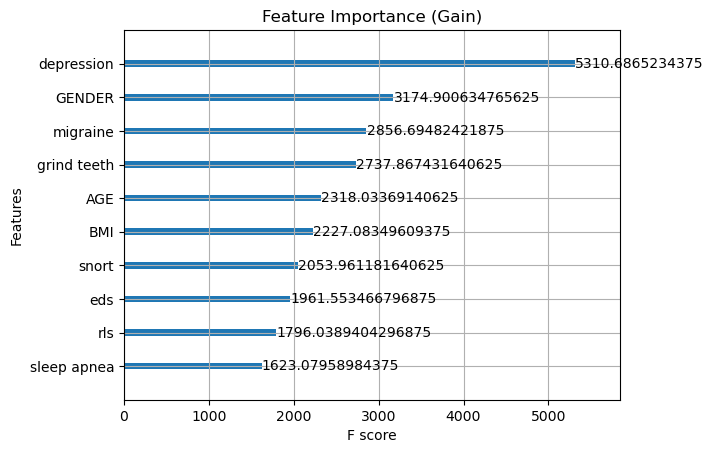

Özellik Önem Skorları:
                              Feature   Importance
26                         depression  5310.686523
18                             GENDER  3174.900635
28                           migraine  2856.694824
35                        grind teeth  2737.867432
17                                AGE  2318.033691
19                                BMI  2227.083496
32                              snort  2053.961182
34                                eds  1961.553467
33                                rls  1796.038940
24                        sleep apnea  1623.079590
31               difficulty breathing  1500.959106
20                             asthma  1491.991333
23                       hypertension  1254.480713
22                               gerd  1168.020142
29                                osa   854.980042
30                            snoring   755.919983
25                         arrhythmia   703.694946
21                          body pain   489.711212
27      

In [23]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Özellik önem skorlarını çıkart ve görselleştir
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10)  # İlk 10 özelliği göster
plt.title('Feature Importance (Gain)')
plt.show()

# Alternatif olarak, önem skorlarını bir veri çerçevesine aktar
importance = xgb_model.get_score(importance_type='gain')  # Kazanç bazlı önem
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Özellik Önem Skorları:")
print(importance_df)

# Düşük önem taşıyan özelliklerin belirlenmesi
threshold = 0.01  # Minimum önem eşiği
low_importance_features = importance_df[importance_df['Importance'] < threshold]['Feature'].tolist()

print("\nDüşük önem taşıyan özellikler:")
print(low_importance_features)

In [ ]:
# ***************************************************
# Çıkarılacak sütunların listesi
low_importance_features = ['Abnormal_IBI_Moving_4_Mean_Scaled','BVP']

# Bu özellikleri veri setinden çıkarma
X_train_reduced = X_train_filtered.drop(columns=low_importance_features)
X_test_reduced = X_test_filtered.drop(columns=low_importance_features)

# Modeli tekrar eğitme
dtrain_reduced = xgb.DMatrix(X_train_reduced, label=y_train_binary)
dtest_reduced = xgb.DMatrix(X_test_reduced, label=y_test_binary)

xgb_model_reduced = xgb.train(
    params,
    dtrain_reduced,
    num_boost_round=100,
    evals=[(dtrain_reduced, 'train'), (dtest_reduced, 'eval')],
    early_stopping_rounds=10,
    verbose_eval=True
)

# Yeni model performansını değerlendirme
y_pred_prob_reduced = xgb_model_reduced.predict(dtest_reduced)
y_pred_binary_reduced = (y_pred_prob_reduced > 0.5).astype(int)

accuracy_reduced = accuracy_score(y_test_binary, y_pred_binary_reduced)
print(f"Test Accuracy (Reduced Features): {accuracy_reduced:.4f}")

[0]	train-logloss:0.49572	eval-logloss:0.53497
[1]	train-logloss:0.42874	eval-logloss:0.54055
[2]	train-logloss:0.37576	eval-logloss:0.54558
[3]	train-logloss:0.33107	eval-logloss:0.55107
[4]	train-logloss:0.29415	eval-logloss:0.55487
[5]	train-logloss:0.26284	eval-logloss:0.56346
[6]	train-logloss:0.23532	eval-logloss:0.56787
[7]	train-logloss:0.21065	eval-logloss:0.57040
[8]	train-logloss:0.18919	eval-logloss:0.57382
[9]	train-logloss:0.17023	eval-logloss:0.57676
Test Accuracy (Reduced Features): 0.7136


In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.preprocessing import StandardScaler

# Özelliklerin ölçeklendirilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SGDClassifier tanımlama
sgd = SGDClassifier(
    loss='log_loss',  # Düzeltildi: 'log' yerine 'log_loss'
    penalty='l2',  # L2 düzenleme
    max_iter=1,  # Her çağrıda sadece bir iterasyon yapacak
    warm_start=True,  # Model bir önceki iterasyondan devam edecek
    random_state=42,
    learning_rate='optimal'
)

# Eğitim: İterasyonlar sırasında loss değerlerini kaydet
n_epochs = 50  # Toplam iterasyon sayısı
loss_values = []

print("İterasyon başlıyor:")
for epoch in range(n_epochs):
    sgd.partial_fit(X_train_scaled, y_train_binary, classes=[0, 1])  # Her iterasyonda bir eğitim adımı
    y_pred_prob = sgd.predict_proba(X_train_scaled)[:, 1]  # Olasılık tahmini
    loss = log_loss(y_train_binary, y_pred_prob)  # Log-loss hesaplama
    loss_values.append(loss)
    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss:.4f}")

# Test setinde tahmin yapma
y_pred = sgd.predict(X_test_scaled)
accuracy = accuracy_score(y_test_binary, y_pred)

# Performans değerlendirme
print("\nTest Accuracy (SGDClassifier Logistic Regression): {:.4f}".format(accuracy))

İterasyon başlıyor:
Epoch 1/50, Loss: 0.5038
Epoch 2/50, Loss: 0.5033
Epoch 3/50, Loss: 0.5031
Epoch 4/50, Loss: 0.5031
Epoch 5/50, Loss: 0.5030
Epoch 6/50, Loss: 0.5030
Epoch 7/50, Loss: 0.5029
Epoch 8/50, Loss: 0.5029
Epoch 9/50, Loss: 0.5029
Epoch 10/50, Loss: 0.5029
Epoch 11/50, Loss: 0.5029
Epoch 12/50, Loss: 0.5028
Epoch 13/50, Loss: 0.5028
Epoch 14/50, Loss: 0.5028
Epoch 15/50, Loss: 0.5028
Epoch 16/50, Loss: 0.5028
Epoch 17/50, Loss: 0.5028
Epoch 18/50, Loss: 0.5028
Epoch 19/50, Loss: 0.5028
Epoch 20/50, Loss: 0.5028
Epoch 21/50, Loss: 0.5028
Epoch 22/50, Loss: 0.5028
Epoch 23/50, Loss: 0.5028
Epoch 24/50, Loss: 0.5028
Epoch 25/50, Loss: 0.5028
Epoch 26/50, Loss: 0.5028
Epoch 27/50, Loss: 0.5028
Epoch 28/50, Loss: 0.5028
Epoch 29/50, Loss: 0.5028
Epoch 30/50, Loss: 0.5027
Epoch 31/50, Loss: 0.5027
Epoch 32/50, Loss: 0.5027
Epoch 33/50, Loss: 0.5027
Epoch 34/50, Loss: 0.5027
Epoch 35/50, Loss: 0.5027
Epoch 36/50, Loss: 0.5027
Epoch 37/50, Loss: 0.5027
Epoch 38/50, Loss: 0.5027
E

In [25]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.preprocessing import StandardScaler

# Özelliklerin ölçeklendirilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train5)
X_test_scaled = scaler.transform(X_test5)

# SGDClassifier tanımlama
sgd = SGDClassifier(
    loss='log_loss',  # Düzeltildi: 'log' yerine 'log_loss'
    penalty='l2',  # L2 düzenleme
    max_iter=1,  # Her çağrıda sadece bir iterasyon yapacak
    warm_start=True,  # Model bir önceki iterasyondan devam edecek
    random_state=42,
    learning_rate='optimal'
)

# Eğitim: İterasyonlar sırasında loss değerlerini kaydet
n_epochs = 50  # Toplam iterasyon sayısı
loss_values = []

print("İterasyon başlıyor:")
for epoch in range(n_epochs):
    sgd.partial_fit(X_train_scaled, y_train_binary, classes=[0, 1])  # Her iterasyonda bir eğitim adımı
    y_pred_prob = sgd.predict_proba(X_train_scaled)[:, 1]  # Olasılık tahmini
    loss = log_loss(y_train_binary, y_pred_prob)  # Log-loss hesaplama
    loss_values.append(loss)
    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss:.4f}")

# Test setinde tahmin yapma
y_pred = sgd.predict(X_test_scaled)
accuracy = accuracy_score(y_test_binary, y_pred)

# Performans değerlendirme
print("\nTest Accuracy (SGDClassifier Logistic Regression): {:.4f}".format(accuracy))

İterasyon başlıyor:
Epoch 1/50, Loss: 0.4928
Epoch 2/50, Loss: 0.4917
Epoch 3/50, Loss: 0.4913
Epoch 4/50, Loss: 0.4912
Epoch 5/50, Loss: 0.4911
Epoch 6/50, Loss: 0.4910
Epoch 7/50, Loss: 0.4910
Epoch 8/50, Loss: 0.4910
Epoch 9/50, Loss: 0.4909
Epoch 10/50, Loss: 0.4909
Epoch 11/50, Loss: 0.4909
Epoch 12/50, Loss: 0.4909
Epoch 13/50, Loss: 0.4909
Epoch 14/50, Loss: 0.4909
Epoch 15/50, Loss: 0.4909
Epoch 16/50, Loss: 0.4909
Epoch 17/50, Loss: 0.4909
Epoch 18/50, Loss: 0.4909
Epoch 19/50, Loss: 0.4909
Epoch 20/50, Loss: 0.4909
Epoch 21/50, Loss: 0.4909
Epoch 22/50, Loss: 0.4909
Epoch 23/50, Loss: 0.4909
Epoch 24/50, Loss: 0.4909
Epoch 25/50, Loss: 0.4909
Epoch 26/50, Loss: 0.4909
Epoch 27/50, Loss: 0.4909
Epoch 28/50, Loss: 0.4909
Epoch 29/50, Loss: 0.4909
Epoch 30/50, Loss: 0.4909
Epoch 31/50, Loss: 0.4909
Epoch 32/50, Loss: 0.4909
Epoch 33/50, Loss: 0.4909
Epoch 34/50, Loss: 0.4909
Epoch 35/50, Loss: 0.4909
Epoch 36/50, Loss: 0.4909
Epoch 37/50, Loss: 0.4909
Epoch 38/50, Loss: 0.4909
E

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.preprocessing import StandardScaler

# Özelliklerin ölçeklendirilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SGDClassifier tanımlama
sgd = SGDClassifier(
    loss='log_loss',      # Logistic Regression için log-loss
    penalty='elasticnet', # L1 ve L2 düzenleme kombinasyonu
    max_iter=1,           # Her çağrıda sadece bir iterasyon yapacak
    warm_start=True,      # Model bir önceki iterasyondan devam edecek
    random_state=42,
    learning_rate='adaptive',  # Dinamik öğrenme oranı
    eta0=0.01,            # Başlangıç öğrenme oranı
    alpha=0.0001          # Düzenleme gücü (L1 ve L2 için)
)

# Eğitim: İterasyonlar sırasında sonuçları kaydet
n_epochs = 50  # Toplam iterasyon sayısı
loss_values = []
train_accuracies = []
test_accuracies = []

print("İterasyon başlıyor:")
for epoch in range(n_epochs):
    # Modeli bir iterasyon daha eğit
    sgd.partial_fit(X_train_scaled, y_train_binary, classes=[0, 1])
    
    # Eğitim seti tahminleri ve kaybı
    y_train_pred_prob = sgd.predict_proba(X_train_scaled)[:, 1]
    train_loss = log_loss(y_train_binary, y_train_pred_prob)
    loss_values.append(train_loss)
    
    y_train_pred = sgd.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train_binary, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Test seti tahminleri ve doğruluğu
    y_test_pred = sgd.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test_binary, y_test_pred)
    test_accuracies.append(test_accuracy)
    
    # Her iterasyonun sonuçlarını yazdır
    print(f"Epoch {epoch + 1}/{n_epochs}")
    print(f"- Training Loss: {train_loss:.4f}")
    print(f"- Training Accuracy: {train_accuracy:.4f}")
    print(f"- Test Accuracy: {test_accuracy:.4f}\n")

# Tüm iterasyonlardan sonra sonuçları inceleme
print("Eğitim Tamamlandı!")
print(f"Final Training Loss: {loss_values[-1]:.4f}")
print(f"Final Training Accuracy: {train_accuracies[-1]:.4f}")
print(f"Final Test Accuracy: {test_accuracies[-1]:.4f}")

İterasyon başlıyor:
Epoch 1/50
- Training Loss: 0.5115
- Training Accuracy: 0.7665
- Test Accuracy: 0.7599

Epoch 2/50
- Training Loss: 0.5115
- Training Accuracy: 0.7665
- Test Accuracy: 0.7599

Epoch 3/50
- Training Loss: 0.5115
- Training Accuracy: 0.7665
- Test Accuracy: 0.7599

Epoch 4/50
- Training Loss: 0.5115
- Training Accuracy: 0.7665
- Test Accuracy: 0.7599

Epoch 5/50
- Training Loss: 0.5115
- Training Accuracy: 0.7665
- Test Accuracy: 0.7599

Epoch 6/50
- Training Loss: 0.5115
- Training Accuracy: 0.7665
- Test Accuracy: 0.7599

Epoch 7/50
- Training Loss: 0.5115
- Training Accuracy: 0.7665
- Test Accuracy: 0.7599

Epoch 8/50
- Training Loss: 0.5115
- Training Accuracy: 0.7665
- Test Accuracy: 0.7599

Epoch 9/50
- Training Loss: 0.5115
- Training Accuracy: 0.7665
- Test Accuracy: 0.7599

Epoch 10/50
- Training Loss: 0.5115
- Training Accuracy: 0.7665
- Test Accuracy: 0.7599



KeyboardInterrupt: 

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Özelliklerin ölçeklendirilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression modeli tanımlama
logreg = LogisticRegression(
    solver='saga',
    penalty='l1',  # L1 düzenleme
    C=0.5,  # Regularization strength
    class_weight='balanced',  # Veri dengesizliği için
    random_state=42
)

# Modelin eğitimi
logreg.fit(X_train_scaled, y_train_binary)

# Test setinde tahmin yapma
y_pred = logreg.predict(X_test_scaled)

# Performans değerlendirme
accuracy = accuracy_score(y_test_binary, y_pred)
print("Test Accuracy (Optimized Logistic Regression):", accuracy)
print(classification_report(y_test_binary, y_pred))

Test Accuracy (Optimized Logistic Regression): 0.7165771907710856
              precision    recall  f1-score   support

           0       0.81      0.82      0.81   3459856
           1       0.41      0.39      0.40   1101894

    accuracy                           0.72   4561750
   macro avg       0.61      0.61      0.61   4561750
weighted avg       0.71      0.72      0.71   4561750



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Özelliklerin ölçeklendirilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression modeli tanımlama
logreg = LogisticRegression(
    solver='saga',
    penalty='elasticnet',  # ElasticNet düzenleme
    C=0.5,                 # Regularization strength
    l1_ratio=0.5,          # L1 ve L2 arasındaki denge
    class_weight='balanced',  # Veri dengesizliği için
    random_state=42,
    n_jobs=-1
)

# Modelin eğitimi
logreg.fit(X_train_scaled, y_train_binary)

# Test setinde tahmin yapma
y_pred = logreg.predict(X_test_scaled)

# Performans değerlendirme
accuracy = accuracy_score(y_test_binary, y_pred)
print("Test Accuracy (Optimized Logistic Regression):", accuracy)
print(classification_report(y_test_binary, y_pred))


Test Accuracy (Optimized Logistic Regression): 0.71657850605579
              precision    recall  f1-score   support

           0       0.81      0.82      0.81   3459856
           1       0.41      0.39      0.40   1101894

    accuracy                           0.72   4561750
   macro avg       0.61      0.61      0.61   4561750
weighted avg       0.71      0.72      0.71   4561750



In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE uygulanmadan önce sütunları çıkart
columns_to_remove = ['diabetes', 'cad', 'anxiety', 'rbd', 'hypersomnia', 
                     'insomnia', 'fatigue', 'morning headaches', 'bruxism', 
                     'snore', 'headache']
X_train_filtered = X_train.drop(columns=columns_to_remove)
X_test_filtered = X_test.drop(columns=columns_to_remove)

# Mevcut veri dağılımını kontrol et
print("Class distribution before SMOTE:")
print(pd.Series(y_train_binary).value_counts())

# Hedeflenen toplam örnek sayısını belirle
target_count_1 = 3100000
current_count_1 = sum(y_train_binary == 1)
current_count_0 = sum(y_train_binary == 0)

# SMOTE için sampling strategy hesapla
sampling_strategy = {0: current_count_0, 1: target_count_1}
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# SMOTE ile yapay veri üretme
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_filtered, y_train_binary)

# Yeni veri dağılımını kontrol et
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution before SMOTE:
0    7843798
1    2744273
Name: count, dtype: int64


In [ ]:
#y_train4 ve y_yest4 (4. dataset) ile eğitilmiş model - yes early stopping - columnlar çıkartılıp:

import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Çıkarılacak sütunların listesi
columns_to_remove = ['diabetes', 'cad', 'anxiety', 'rbd', 'hypersomnia', 
                     'insomnia', 'fatigue', 'morning headaches', 'bruxism', 
                     'snore', 'headache']

# dtrain ve dtest için sütunları çıkart
X_train_filtered = X_train4.drop(columns=columns_to_remove)
X_test_filtered = X_test4.drop(columns=columns_to_remove)

# DMatrix formatında veri hazırlama
dtrain_filtered = xgb.DMatrix(X_train_filtered, label=y_train_binary)
dtest_filtered = xgb.DMatrix(X_test_filtered, label=y_test_binary)

# Parametreler
params = {
    'objective': 'binary:logistic',  # İkili sınıflandırma
    'max_depth': 48,
    'learning_rate': 0.1,
    'min_child_weight': 5,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'eval_metric': 'logloss',  # Değerlendirme metriği
    'seed': 42
}

# Modeli eğitme ve Early Stopping
evals = [(dtrain_filtered, 'train'), (dtest_filtered, 'eval')]  # Eğitim ve değerlendirme setleri
xgb_model = xgb.train(
    params,
    dtrain_filtered,
    num_boost_round=100,  # Maksimum iterasyon
    evals=evals,
    early_stopping_rounds=10,  # Performans iyileşmezse 10 iterasyonda durdur
    verbose_eval=True
)

# Test setinde değerlendirme
y_pred_prob = xgb_model.predict(dtest_filtered)
y_pred_binary = (y_pred_prob > 0.5).astype(int)  # Olasılıkları sınıfa dönüştürme

# Performans ölçütleri
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Test Accuracy (XGBoost Binary with Early Stopping): {accuracy:.4f}")
print("Confusion Matrix (XGBoost Binary with Early Stopping):")
print(confusion_matrix(y_test_binary, y_pred_binary))
print("Classification Report (XGBoost Binary with Early Stopping):")
print(classification_report(y_test_binary, y_pred_binary))


[0]	train-logloss:0.47189	eval-logloss:0.57673
[1]	train-logloss:0.40727	eval-logloss:0.57944
[2]	train-logloss:0.35587	eval-logloss:0.57651
[3]	train-logloss:0.31344	eval-logloss:0.57827
[4]	train-logloss:0.27779	eval-logloss:0.58486
[5]	train-logloss:0.24743	eval-logloss:0.59068
[6]	train-logloss:0.22133	eval-logloss:0.59677
[7]	train-logloss:0.19849	eval-logloss:0.60038
[8]	train-logloss:0.17838	eval-logloss:0.60245
[9]	train-logloss:0.16067	eval-logloss:0.60806
[10]	train-logloss:0.14505	eval-logloss:0.61170
[11]	train-logloss:0.13180	eval-logloss:0.61037
Test Accuracy (XGBoost Binary with Early Stopping): 0.6850
Confusion Matrix (XGBoost Binary with Early Stopping):
[[2819521  600967]
 [ 861676  361181]]
Classification Report (XGBoost Binary with Early Stopping):
              precision    recall  f1-score   support

           0       0.77      0.82      0.79   3420488
           1       0.38      0.30      0.33   1222857

    accuracy                           0.69   4643345
   

In [21]:
#y_train4 ve y_yest4 (4. dataset) ile eğitilmiş model - yes early stopping -column çıkartılmadan:

import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# dtrain ve dtest için sütunları çıkart
X_train_filtered = X_train4
X_test_filtered = X_test4

# DMatrix formatında veri hazırlama
dtrain_filtered = xgb.DMatrix(X_train_filtered, label=y_train_binary)
dtest_filtered = xgb.DMatrix(X_test_filtered, label=y_test_binary)

# Parametreler
params = {
    'objective': 'binary:logistic',  # İkili sınıflandırma
    'max_depth': 48,
    'learning_rate': 0.1,
    'min_child_weight': 5,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'eval_metric': 'logloss',  # Değerlendirme metriği
    'seed': 42
}

# Modeli eğitme ve Early Stopping
evals = [(dtrain_filtered, 'train'), (dtest_filtered, 'eval')]  # Eğitim ve değerlendirme setleri
xgb_model = xgb.train(
    params,
    dtrain_filtered,
    num_boost_round=100,  # Maksimum iterasyon
    evals=evals,
    early_stopping_rounds=10,  # Performans iyileşmezse 10 iterasyonda durdur
    verbose_eval=True
)

# Test setinde değerlendirme
y_pred_prob = xgb_model.predict(dtest_filtered)
y_pred_binary = (y_pred_prob > 0.5).astype(int)  # Olasılıkları sınıfa dönüştürme

# Performans ölçütleri
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Test Accuracy (XGBoost Binary with Early Stopping): {accuracy:.4f}")
print("Confusion Matrix (XGBoost Binary with Early Stopping):")
print(confusion_matrix(y_test_binary, y_pred_binary))
print("Classification Report (XGBoost Binary with Early Stopping):")
print(classification_report(y_test_binary, y_pred_binary))


[0]	train-logloss:0.47169	eval-logloss:0.57967
[1]	train-logloss:0.40749	eval-logloss:0.57813
[2]	train-logloss:0.35630	eval-logloss:0.57977
[3]	train-logloss:0.31398	eval-logloss:0.58535
[4]	train-logloss:0.27819	eval-logloss:0.58633
[5]	train-logloss:0.24832	eval-logloss:0.58905
[6]	train-logloss:0.22196	eval-logloss:0.59042
[7]	train-logloss:0.19888	eval-logloss:0.59269
[8]	train-logloss:0.17885	eval-logloss:0.59273
[9]	train-logloss:0.16112	eval-logloss:0.59279
[10]	train-logloss:0.14542	eval-logloss:0.59247
Test Accuracy (XGBoost Binary with Early Stopping): 0.7003
Confusion Matrix (XGBoost Binary with Early Stopping):
[[2927566  492922]
 [ 898543  324314]]
Classification Report (XGBoost Binary with Early Stopping):
              precision    recall  f1-score   support

           0       0.77      0.86      0.81   3420488
           1       0.40      0.27      0.32   1222857

    accuracy                           0.70   4643345
   macro avg       0.58      0.56      0.56   46433

In [22]:
#y_train4 ve y_yest4 (4. dataset) ile eğitilmiş model - yes early stopping(sınır 6) -column çıkartılmadan:

import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# dtrain ve dtest için sütunları çıkart
X_train_filtered = X_train4
X_test_filtered = X_test4

# DMatrix formatında veri hazırlama
dtrain_filtered = xgb.DMatrix(X_train_filtered, label=y_train_binary)
dtest_filtered = xgb.DMatrix(X_test_filtered, label=y_test_binary)

# Parametreler
params = {
    'objective': 'binary:logistic',  # İkili sınıflandırma
    'max_depth': 48,
    'learning_rate': 0.1,
    'min_child_weight': 5,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'eval_metric': 'logloss',  # Değerlendirme metriği
    'seed': 42
}

# Modeli eğitme ve Early Stopping
evals = [(dtrain_filtered, 'train'), (dtest_filtered, 'eval')]  # Eğitim ve değerlendirme setleri
xgb_model = xgb.train(
    params,
    dtrain_filtered,
    num_boost_round=100,  # Maksimum iterasyon
    evals=evals,
    early_stopping_rounds=6,  # Performans iyileşmezse 10 iterasyonda durdur
    verbose_eval=True
)

# Test setinde değerlendirme
y_pred_prob = xgb_model.predict(dtest_filtered)
y_pred_binary = (y_pred_prob > 0.5).astype(int)  # Olasılıkları sınıfa dönüştürme

# Performans ölçütleri
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Test Accuracy (XGBoost Binary with Early Stopping): {accuracy:.4f}")
print("Confusion Matrix (XGBoost Binary with Early Stopping):")
print(confusion_matrix(y_test_binary, y_pred_binary))
print("Classification Report (XGBoost Binary with Early Stopping):")
print(classification_report(y_test_binary, y_pred_binary))


[0]	train-logloss:0.47169	eval-logloss:0.57967
[1]	train-logloss:0.40749	eval-logloss:0.57813
[2]	train-logloss:0.35630	eval-logloss:0.57977
[3]	train-logloss:0.31398	eval-logloss:0.58535
[4]	train-logloss:0.27819	eval-logloss:0.58633
[5]	train-logloss:0.24832	eval-logloss:0.58905
[6]	train-logloss:0.22196	eval-logloss:0.59042
[7]	train-logloss:0.19888	eval-logloss:0.59269
Test Accuracy (XGBoost Binary with Early Stopping): 0.7063
Confusion Matrix (XGBoost Binary with Early Stopping):
[[3025344  395144]
 [ 968513  254344]]
Classification Report (XGBoost Binary with Early Stopping):
              precision    recall  f1-score   support

           0       0.76      0.88      0.82   3420488
           1       0.39      0.21      0.27   1222857

    accuracy                           0.71   4643345
   macro avg       0.57      0.55      0.54   4643345
weighted avg       0.66      0.71      0.67   4643345



In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE uygulanmadan önce sütunları çıkart
columns_to_remove = ['diabetes', 'cad', 'anxiety', 'rbd', 'hypersomnia', 
                     'insomnia', 'fatigue', 'morning headaches', 'bruxism', 
                     'snore', 'headache']
X_train_filtered = X_train.drop(columns=columns_to_remove)

# Mevcut veri dağılımını kontrol et
print("Class distribution before SMOTE:")
print(pd.Series(y_train_binary).value_counts())

# Hedeflenen toplam örnek sayısını belirle
target_count_1 = 5703964
current_count_1 = sum(y_train_binary == 1)
current_count_0 = sum(y_train_binary == 0)

# SMOTE için sampling strategy hesapla
sampling_strategy = {0: current_count_0, 1: target_count_1}
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# SMOTE ile yapay veri üretme
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_filtered, y_train_binary)

# Yeni veri dağılımını kontrol et
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# DMatrix formatında veri hazırlama
dtrain_resampled = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest_filtered = xgb.DMatrix(X_test.drop(columns=columns_to_remove), label=y_test_binary)

# Parametreler
params = {
    'objective': 'binary:logistic',  # İkili sınıflandırma
    'max_depth': 48,
    'learning_rate': 0.1,
    'min_child_weight': 5,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'eval_metric': 'logloss',  # Değerlendirme metriği
    'seed': 42
}

# Modeli eğitme ve Early Stopping
evals = [(dtrain_resampled, 'train'), (dtest_filtered, 'eval')]  # Eğitim ve değerlendirme setleri
xgb_model = xgb.train(
    params,
    dtrain_resampled,
    num_boost_round=100,  # Maksimum iterasyon
    evals=evals,
    early_stopping_rounds=10,  # Performans iyileşmezse 10 iterasyonda durdur
    verbose_eval=True
)

# Test setinde değerlendirme
y_pred_prob = xgb_model.predict(dtest_filtered)
y_pred_binary = (y_pred_prob > 0.5).astype(int)  # Olasılıkları sınıfa dönüştürme

# Performans ölçütleri
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Test Accuracy (XGBoost Binary with Early Stopping): {accuracy:.4f}")
print("Confusion Matrix (XGBoost Binary with Early Stopping):")
print(confusion_matrix(y_test_binary, y_pred_binary))
print("Classification Report (XGBoost Binary with Early Stopping):")
print(classification_report(y_test_binary, y_pred_binary))


Class distribution before SMOTE:
0    7691924
1    2851982
Name: count, dtype: int64


In [23]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [30]:
print(X_train.shape)  # (num_samples, timesteps, num_features)
print(X_test.shape)   # (num_samples, timesteps, num_features)

(10543906, 48)
(4541204, 48)


In [31]:
X_train.columns

Index(['TIMESTAMP', 'BVP', 'ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR',
       'IBI', 'IBI_Moving_Average_640', 'IBI_Moving_STD_640', 'ACC',
       'HR_Divided_Mean', 'HR_Divided_Median',
       'Abnormal_IBI_Moving_4_Mean_Scaled', 'Abnormal_IBI_Moving_3',
       'Abnormal_IBI_Moving_4', 'AGE', 'GENDER', 'BMI', 'asthma', 'body pain',
       'gerd', 'hypertension', 'sleep apnea', 'arrhythmia', 'depression',
       'dyspnea', 'diabetes', 'cad', 'anxiety', 'migraine', 'osa', 'snoring',
       'difficulty breathing', 'difficulty staying asleep', 'snort', 'rls',
       'eds', 'rbd', 'hypersomnia', 'grind teeth', 'insomnia', 'fatigue',
       'morning headaches', 'bruxism', 'snore', 'headache'],
      dtype='object')

fatigue = 3 hastada
bruxism = 5 hastada
rbd = 2
eds = 36
rls= 18
asthma= 20
body pain = 37
gerd = 26
snore = 3
headache = 14

hepsi 1 az (column da yazan adı unutmuşum bakarken)

In [21]:
# Tüm hastaların anahtarlarını al
all_patients5 = list(train_set1.keys())

# Rastgele 68 hasta anahtarını seç
random_train_keys5 = random.sample(all_patients5, 68)

# Kalan hastalar
remaining_keys5 = [key for key in all_patients5 if key not in random_train_keys5]
test_keys5 = random.sample(remaining_keys5, 30)

# Train ve test DataFrame'lerini oluştur
train_data5 = pd.concat(
    [train_set1[key].assign(patient_id=key) for key in random_train_keys5], axis=0
)
test_data5 = pd.concat(
    [train_set1[key].assign(patient_id=key) for key in test_keys5], axis=0
)

# X ve y ayrımı yap
X_train5 = train_data5.drop(columns=['Sleep_Stage'])
y_train5 = train_data5['Sleep_Stage']
X_test5 = test_data5.drop(columns=['Sleep_Stage'])
y_test5 = test_data5['Sleep_Stage']

# Sonuçları kontrol etmek için bazı çıktılar
print(f"Training set keys: {sorted(random_train_keys5)}")
print(f"Testing set keys: {sorted(test_keys5)}")
print(f"Training set size: {len(train_data5)}")
print(f"Testing set size: {len(test_data5)}")

Training set keys: ['S002', 'S003', 'S004', 'S006', 'S007', 'S008', 'S009', 'S011', 'S013', 'S015', 'S016', 'S017', 'S018', 'S019', 'S021', 'S023', 'S024', 'S025', 'S026', 'S032', 'S033', 'S034', 'S036', 'S037', 'S038', 'S039', 'S042', 'S043', 'S044', 'S046', 'S047', 'S049', 'S053', 'S054', 'S055', 'S058', 'S059', 'S063', 'S065', 'S067', 'S068', 'S069', 'S072', 'S073', 'S074', 'S076', 'S078', 'S079', 'S081', 'S082', 'S083', 'S084', 'S085', 'S086', 'S087', 'S089', 'S091', 'S092', 'S093', 'S094', 'S095', 'S096', 'S097', 'S099', 'S100', 'S101', 'S102', 'S103']
Testing set keys: ['S005', 'S010', 'S012', 'S014', 'S020', 'S022', 'S028', 'S029', 'S030', 'S031', 'S035', 'S040', 'S045', 'S048', 'S050', 'S051', 'S052', 'S056', 'S057', 'S061', 'S062', 'S064', 'S066', 'S070', 'S071', 'S075', 'S080', 'S088', 'S090', 'S098']
Training set size: 10514918
Testing set size: 4570192


In [19]:
for patient in train_set1.keys():
    print(f"Patient {patient} data shape: {train_set1[patient].shape}")

Patient S083 data shape: (148033, 49)
Patient S029 data shape: (154560, 49)
Patient S084 data shape: (157440, 49)
Patient S091 data shape: (158016, 49)
Patient S096 data shape: (159361, 49)
Patient S069 data shape: (165120, 49)
Patient S058 data shape: (152449, 49)
Patient S018 data shape: (157633, 49)
Patient S068 data shape: (159745, 49)
Patient S097 data shape: (150529, 49)
Patient S090 data shape: (149569, 49)
Patient S085 data shape: (142657, 49)
Patient S028 data shape: (153409, 49)
Patient S082 data shape: (140160, 49)
Patient S019 data shape: (138240, 49)
Patient S059 data shape: (157633, 49)
Patient S054 data shape: (153409, 49)
Patient S006 data shape: (161857, 49)
Patient S053 data shape: (160512, 49)
Patient S013 data shape: (150913, 49)
Patient S046 data shape: (138625, 49)
Patient S014 data shape: (152833, 49)
Patient S100 data shape: (165505, 49)
Patient S088 data shape: (145728, 49)
Patient S022 data shape: (165505, 49)
Patient S025 data shape: (158593, 49)
Patient S070

In [22]:
# Çıkarılacak sütunların listesi
columns_to_remove = ['diabetes', 'cad', 'anxiety', 'rbd', 'hypersomnia', 
                     'insomnia', 'fatigue', 'morning headaches', 'bruxism', 
                     'snore', 'headache']

# dtrain ve dtest için sütunları çıkart
X_train5_filtered = X_train5.drop(columns=columns_to_remove)
X_test5_filtered = X_test5.drop(columns=columns_to_remove)

In [24]:
len(X_train5_filtered.columns)

38

In [27]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Eğitim ve test setlerini dönüştür
# Sadece 'W' sınıfı 1, diğer sınıflar 0 olacak şekilde encode et
y_train5_binary = np.where(y_train5 == 'W', 1, 0)
y_test5_binary = np.where(y_test5 == 'W', 1, 0)

# Encode edilmiş sonuçları kontrol et
print("Encoded y_train_binary unique values:", np.unique(y_train5_binary))
print("Encoded y_test_binary unique values:", np.unique(y_test5_binary))

# Not: 'np.where' ile hızlı bir şekilde koşula bağlı dönüşüm yapıldı.
# Bu işlemde 'W' -> 1 ve diğer sınıflar -> 0 olacak şekilde dönüştürüldü.

Encoded y_train_binary unique values: [0 1]
Encoded y_test_binary unique values: [0 1]


In [ ]:
#X_train ve y_train ile ve early stopping kullanılarak:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# DMatrix formatında veri hazırlama
dtrain = xgb.DMatrix(X_train, label=y_train_binary)
dtest = xgb.DMatrix(X_test, label=y_test_binary)

# Parametreler
params = {
    'objective': 'binary:logistic',  # İkili sınıflandırma
    'max_depth': 48,
    'learning_rate': 0.1,
    'min_child_weight': 5,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'eval_metric': 'logloss',  # Değerlendirme metriği
    'seed': 42
}

# Modeli eğitme ve Early Stopping
evals = [(dtrain, 'train'), (dtest, 'eval')]  # Eğitim ve değerlendirme setleri
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,  # Maksimum iterasyon
    evals=evals,
    early_stopping_rounds=10,  # Performans iyileşmezse 10 iterasyonda durdur
    verbose_eval=True
)

# Test setinde değerlendirme
y_pred_prob = xgb_model.predict(dtest)
y_pred_binary = (y_pred_prob > 0.5).astype(int)  # Olasılıkları sınıfa dönüştürme

# Performans ölçütleri
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Test Accuracy (XGBoost Binary with Early Stopping): {accuracy:.4f}")
print("Confusion Matrix (XGBoost Binary with Early Stopping):")
print(confusion_matrix(y_test_binary, y_pred_binary))
print("Classification Report (XGBoost Binary with Early Stopping):")
print(classification_report(y_test_binary, y_pred_binary))


[0]	train-logloss:0.48895	eval-logloss:0.54002
[1]	train-logloss:0.42290	eval-logloss:0.54258
[2]	train-logloss:0.36999	eval-logloss:0.54667
[3]	train-logloss:0.32614	eval-logloss:0.55600
[4]	train-logloss:0.28892	eval-logloss:0.55977
[5]	train-logloss:0.25782	eval-logloss:0.56125
[6]	train-logloss:0.23043	eval-logloss:0.56221
[7]	train-logloss:0.20639	eval-logloss:0.56696
[8]	train-logloss:0.18551	eval-logloss:0.56666
[9]	train-logloss:0.16706	eval-logloss:0.57104
[10]	train-logloss:0.15074	eval-logloss:0.57180
Test Accuracy (XGBoost Binary with Early Stopping): 0.7171
Confusion Matrix (XGBoost Binary with Early Stopping):
[[2843989  691511]
 [ 595561  418591]]
Classification Report (XGBoost Binary with Early Stopping):
              precision    recall  f1-score   support

           0       0.83      0.80      0.82   3535500
           1       0.38      0.41      0.39   1014152

    accuracy                           0.72   4549652
   macro avg       0.60      0.61      0.60   45496

In [22]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Eğitim ve test setlerini dönüştür
# Sadece 'W' sınıfı 1, diğer sınıflar 0 olacak şekilde encode et
y_train_binary2 = np.where(y_train4 == 'W', 1, 0)
y_test_binary2 = np.where(y_test4 == 'W', 1, 0)

# Encode edilmiş sonuçları kontrol et
print("Encoded y_train_binary unique values:", np.unique(y_train_binary2))
print("Encoded y_test_binary unique values:", np.unique(y_test_binary2))

# Not: 'np.where' ile hızlı bir şekilde koşula bağlı dönüşüm yapıldı.
# Bu işlemde 'W' -> 1 ve diğer sınıflar -> 0 olacak şekilde dönüştürüldü.

Encoded y_train_binary unique values: [0 1]
Encoded y_test_binary unique values: [0 1]


In [24]:
w_count = y_train4.value_counts().get('W', 0)

# Sonucu yazdır
print(f"'W' olan değerlerin sayısı: {w_count}")

'W' olan değerlerin sayısı: 2702225


In [25]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# DMatrix formatında veri hazırlama
dtrain = xgb.DMatrix(X_train4, label=y_train_binary2)
dtest = xgb.DMatrix(X_test4, label=y_test_binary2)

# Parametreler
params = {
    'objective': 'binary:logistic',  # İkili sınıflandırma
    'max_depth': 48,
    'learning_rate': 0.1,
    'min_child_weight': 5,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'eval_metric': 'logloss',  # Değerlendirme metriği
    'seed': 42
}

# Modeli eğitme ve Early Stopping
evals = [(dtrain, 'train'), (dtest, 'eval')]  # Eğitim ve değerlendirme setleri
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,  # Maksimum iterasyon
    evals=evals,
    early_stopping_rounds=10,  # Performans iyileşmezse 10 iterasyonda durdur
    verbose_eval=True
)

# Test setinde değerlendirme
y_pred_prob = xgb_model.predict(dtest)
y_pred_binary = (y_pred_prob > 0.5).astype(int)  # Olasılıkları sınıfa dönüştürme

# Performans ölçütleri
accuracy = accuracy_score(y_test_binary2, y_pred_binary)
print(f"Test Accuracy (XGBoost Binary with Early Stopping): {accuracy:.4f}")
print("Confusion Matrix (XGBoost Binary with Early Stopping):")
print(confusion_matrix(y_test_binary2, y_pred_binary))
print("Classification Report (XGBoost Binary with Early Stopping):")
print(classification_report(y_test_binary2, y_pred_binary))


[0]	train-logloss:0.48546	eval-logloss:0.54979
[1]	train-logloss:0.41963	eval-logloss:0.55107
[2]	train-logloss:0.36684	eval-logloss:0.55646
[3]	train-logloss:0.32320	eval-logloss:0.56595
[4]	train-logloss:0.28625	eval-logloss:0.57132
[5]	train-logloss:0.25536	eval-logloss:0.57916
[6]	train-logloss:0.22815	eval-logloss:0.58609
[7]	train-logloss:0.20430	eval-logloss:0.58988
[8]	train-logloss:0.18357	eval-logloss:0.59560
[9]	train-logloss:0.16523	eval-logloss:0.59969
[10]	train-logloss:0.14905	eval-logloss:0.60521
Test Accuracy (XGBoost Binary with Early Stopping): 0.6787
Confusion Matrix (XGBoost Binary with Early Stopping):
[[2726592  837510]
 [ 653233  422166]]
Classification Report (XGBoost Binary with Early Stopping):
              precision    recall  f1-score   support

           0       0.81      0.77      0.79   3564102
           1       0.34      0.39      0.36   1075399

    accuracy                           0.68   4639501
   macro avg       0.57      0.58      0.57   46395

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=48,min_samples_leaf=5,max_features='sqrt',bootstrap=True,class_weight='balanced',n_jobs=-1,verbose=1, random_state=42)
